https://competitions.desights.ai/challenge/31

# Data Reading, Imports

In [1]:
# plt.rcParams.keys()

In [2]:
#Set your Imports
import os
import sys
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
from seaborn import objects as so
import matplotlib.transforms as mtrans
from summary import summary_summary
import datetime

pd.set_option('display.float_format', lambda x: '%.4f' % x)

sns.set_theme(palette="gist_ncar")
# so.Plot.config.theme.update(palette="CMRmap")

# Add the project root to sys.path
notebook_dir = os.path.dirname(os.path.abspath('F1.ipynb'))
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
if project_root not in sys.path:
    sys.path.append(notebook_dir)

races_dir = "races_2024/"
sing_qual_dir = "singapore_grand_prix_qualifyings_2018-2019-2022-2023/"
sing_races_dir = "singapore_grand_prix_races_2018-2019-2022-2023/"

In [3]:
skip = ["position_2O24.csv", "circuit_2024.csv"]

races = []
sing_qual = []
sing_races = []

# with os.scandir(notebook_dir + "/" + races_dir) as it:
#     for entry in it:
#         if entry.name.endswith(".csv") and entry.is_file():
#             if entry.name in skip:
#                 races.append((None, None))
#                 continue
#             print(entry.name, entry.path)
#             races.append((entry.name, pd.read_csv(entry.path)))

# with os.scandir(notebook_dir + "/" + sing_qual_dir) as it:
#     for entry in it:
#         if entry.name.endswith(".csv") and entry.is_file():
#             if entry.name in skip: continue
#             print(entry.name, entry.path)
#             sing_qual.append((entry.name, pd.read_csv(entry.path)))

# with os.scandir(notebook_dir + "/" + sing_races_dir) as it:
#     for entry in it:
#         if entry.name.endswith(".csv") and entry.is_file():
#             if entry.name in skip: continue
#             print(entry.name, entry.path)
#             sing_races.append((entry.name, pd.read_csv(entry.path)))

In [4]:
# for l in [races, sing_qual, sing_races]:
#     for idx, df in enumerate(l):
#         print()
#         print("**" + df[0] + "**", idx, "\\")
#         print(' -- '.join(df[1].columns))

In [5]:
# races[1][1].iloc[50000:50020]
# races[6][1].head(20)
# races[8][1][races[8][1]["Driver"] == "VER"].iloc[0]

Intro \
Data \
* EDA
    * Totals
        * Pit stops, total
        * Pit stops per team, total
        * Pit stops per driver, total
        * Tire compounds used, total
        * Tire compounds used per team, total
        * Tire compounds used per driver, total
        * Num laps completed on each compound, total / per driver / per team
        * Avg lap time per stint, total / per driver / per team
        * Delta time per tire compound, total / per driver / per team
        * Time spent in pits total / per driver / per team
    * Per race
        * Pit stops total for this race / this team / this driver
        
    

## Columns & File descriptions

### 2024

**weather_2024.csv** 0 \
EventName -- Time -- AirTemp -- Humidity -- Pressure -- Rainfall -- TrackTemp -- WindDirection -- WindSpeed

**position_2O24.csv** 1 \
EventName -- DriverName -- Date -- Status -- X -- Y -- Z -- Source -- Time -- SessionTime

**control_message_2024.csv** 2 \
EventName -- Time -- Category -- Message -- Status -- Flag -- Scope -- Sector -- RacingNumber -- Lap

**result_2024.csv** 3 \
EventName -- DriverNumber -- BroadcastName -- Abbreviation -- DriverId -- TeamName -- TeamColor -- TeamId -- FirstName -- LastName -- FullName -- HeadshotUrl -- CountryCode -- Position -- ClassifiedPosition -- GridPosition -- Q1 -- Q2 -- Q3 -- Time -- Status -- Points

**circuit_2024.csv** 4 \
EventName -- TrackMarker -- X -- Y -- Number -- Letter -- Angle -- Distance

**car_data_2024.csv** 5 \
EventName -- DriverName -- Date -- RPM -- Speed -- nGear -- Throttle -- Brake -- DRS -- Source -- Time -- SessionTime

**session_status_2024.csv** 6 \
EventName -- Time -- Status

**track_status_2024.csv** 7 \
EventName -- Time -- Status -- Message

**lap_2024.csv** 8 \
EventName -- Time -- Driver -- DriverNumber -- LapTime -- LapNumber -- Stint -- PitOutTime -- PitInTime -- Sector1Time -- Sector2Time -- Sector3Time -- Sector1SessionTime -- Sector2SessionTime -- Sector3SessionTime -- SpeedI1 -- SpeedI2 -- SpeedFL -- SpeedST -- IsPersonalBest -- Compound -- TyreLife -- FreshTyre -- Team -- LapStartTime -- LapStartDate -- TrackStatus -- Position -- Deleted -- DeletedReason -- FastF1Generated -- IsAccurate


In [6]:
weather_raw = pd.read_csv("races_2024/weather_2024.csv")
#positions_raw = pd.read_csv("races_2024/position_2O24.csv")
control_msg_raw = pd.read_csv("races_2024/control_message_2024.csv")
results_raw = pd.read_csv("races_2024/result_2024.csv")
#circuits_raw = pd.read_csv("races_2024/circuit_2024.csv")
car_data_raw = pd.read_csv("races_2024/car_data_2024.csv")
session_status_raw = pd.read_csv("races_2024/session_status_2024.csv")
track_status_raw = pd.read_csv("races_2024/track_status_2024.csv")
laps_raw = pd.read_csv("races_2024/lap_2024.csv")

### Singapore 2018-2023

**weather_singapore_grand_prix_2018-2019-2022-2023.csv** 0 \
Year -- Time -- AirTemp -- Humidity -- Pressure -- Rainfall -- TrackTemp -- WindDirection -- WindSpeed

**circuit_singapore_grand_prix_2018-2019-2022-2023.csv** 1 \
Year -- TrackMarker -- X -- Y -- Number -- Letter -- Angle -- Distance

**position_singapore_grand_prix_2018-2019-2022-2023.csv** 2 \
Year -- DriverName -- Date -- Status -- X -- Y -- Z -- Source -- Time -- SessionTime

**car_data_singapore_grand_prix_2018-2019-2022-2023.csv** 3 \
Year -- DriverName -- Date -- RPM -- Speed -- nGear -- Throttle -- Brake -- DRS -- Source -- Time -- SessionTime

**lap_singapore_grand_prix_2018-2019-2022-2023.csv** 4 \
Year -- Time -- Driver -- DriverNumber -- LapTime -- LapNumber -- Stint -- PitOutTime -- PitInTime -- Sector1Time -- Sector2Time -- Sector3Time -- Sector1SessionTime -- Sector2SessionTime -- Sector3SessionTime -- SpeedI1 -- SpeedI2 -- SpeedFL -- SpeedST -- IsPersonalBest -- Compound -- TyreLife -- FreshTyre -- Team -- LapStartTime -- LapStartDate -- TrackStatus -- Position -- Deleted -- DeletedReason -- FastF1Generated -- IsAccurate

**track_status_singapore_grand_prix_2018-2019-2022-2023.csv** 5 \
Year -- Time -- Status -- Message

**result_singapore_grand_prix_2018-2019-2022-2023.csv** 6 \
Year -- DriverNumber -- BroadcastName -- Abbreviation -- DriverId -- TeamName -- TeamColor -- TeamId -- FirstName -- LastName -- FullName -- HeadshotUrl -- CountryCode -- Position -- ClassifiedPosition -- GridPosition -- Q1 -- Q2 -- Q3 -- Time -- Status -- Points

**session_status_singapore_grand_prix_2018-2019-2022-2023.csv** 7 \
Year -- Time -- Status

**control_message_singapore_grand_prix_2018-2019-2022-2023.csv** 8 \
Year -- Time -- Category -- Message -- Status -- Flag -- Scope -- Sector -- RacingNumber -- Lap

**weather_singapore_grand_prix_2018-2019-2022-2023.csv** 0 \
Year -- Time -- AirTemp -- Humidity -- Pressure -- Rainfall -- TrackTemp -- WindDirection -- WindSpeed

**circuit_singapore_grand_prix_2018-2019-2022-2023.csv** 1 \
Year -- TrackMarker -- X -- Y -- Number -- Letter -- Angle -- Distance

**position_singapore_grand_prix_2018-2019-2022-2023.csv** 2 \
Year -- DriverName -- Date -- Status -- X -- Y -- Z -- Source -- Time -- SessionTime

**car_data_singapore_grand_prix_2018-2019-2022-2023.csv** 3 \
Year -- DriverName -- Date -- RPM -- Speed -- nGear -- Throttle -- Brake -- DRS -- Source -- Time -- SessionTime

**lap_singapore_grand_prix_2018-2019-2022-2023.csv** 4 \
Year -- Time -- Driver -- DriverNumber -- LapTime -- LapNumber -- Stint -- PitOutTime -- PitInTime -- Sector1Time -- Sector2Time -- Sector3Time -- Sector1SessionTime -- Sector2SessionTime -- Sector3SessionTime -- SpeedI1 -- SpeedI2 -- SpeedFL -- SpeedST -- IsPersonalBest -- Compound -- TyreLife -- FreshTyre -- Team -- LapStartTime -- LapStartDate -- TrackStatus -- Position -- Deleted -- DeletedReason -- FastF1Generated -- IsAccurate

**track_status_singapore_grand_prix_2018-2019-2022-2023.csv** 5 \
Year -- Time -- Status -- Message

**result_singapore_grand_prix_2018-2019-2022-2023.csv** 6 \
Year -- DriverNumber -- BroadcastName -- Abbreviation -- DriverId -- TeamName -- TeamColor -- TeamId -- FirstName -- LastName -- FullName -- HeadshotUrl -- CountryCode -- Position -- ClassifiedPosition -- GridPosition -- Q1 -- Q2 -- Q3 -- Time -- Status -- Points

**session_status_singapore_grand_prix_2018-2019-2022-2023.csv** 7 \
Year -- Time -- Status

**control_message_singapore_grand_prix_2018-2019-2022-2023.csv** 8 \
Year -- Time -- Category -- Message -- Status -- Flag -- Scope -- Sector -- RacingNumber -- Lap

# Data Cleaning

In [7]:
def parse_laptime_ymdhms(series): # Str-printable format
    assert type(series) == type(pd.Series())
    series = series.copy().astype(str)
    result = []
    # 1900-01-01 00:41:18.944000000
    for item in series:
        item = str(item)
        if item == "nan":
            result.append(np.nan)
        else:
            item = item.split(" ")[1].split(".")
            item[0] = item[0][3:]
            item[1] = item[1][:4]
            item = '.'.join(item)
            
            result.append(item)
    return result

def convert_days_format_to_datetime(series, convert=True):
    # series = series.copy()
    # series = series.astype(str)
    assert type(series) == type(pd.Series())
    times = []
    cp = series.copy().astype(str)
    for t in cp:
        if len(t) > 4:
            # 0 Days HHMMSS.XX
            a = t.split(" ")[2]
            if "." not in a:
                a += ".000000"
            times.append(a)
        else:
            times.append(np.nan)
    if convert: cp = pd.to_datetime(times, format='%H:%M:%S.%f')
    else: cp = times
    return cp

In [8]:
laps_raw["LapTimeDt"] = convert_days_format_to_datetime(laps_raw["LapTime"])
laps_raw["Sec"] = (laps_raw['LapTimeDt'].dt.minute * 60) + laps_raw["LapTimeDt"].dt.second + (laps_raw["LapTimeDt"].dt.microsecond / 1000000)

In [9]:
summary_summary(laps_raw)

,unique,null,dtypes,dupe,outliers,count,mean,std,min,max
Deleted,2,0,bool,0,,,,,,
FastF1Generated,2,0,bool,0,,,,,,
FreshTyre,2,0,bool,0,,,,,,
IsAccurate,2,0,bool,0,,,,,,
DriverNumber,21,0,int64,0,0,17123,27.7856,23.9351,1.0000,81.0000
TrackStatus,21,0,int64,0,135,17123,6.3227,63.4643,1.0000,2671.0000
TyreLife,78,0,float64,0,167,17123,14.8040,11.8374,1.0000,78.0000
Sec,13266,113,float64,0,171,17010,91.3725,74.7567,67.6940,2526.2530
Position,20,15,float64,0,0,17108,9.9174,5.5015,1.0000,20.0000
LapTimeDt,13266,113,datetime64[ns],0,,17010,1900-01-01 00:01:31.372458752,,1900-01-01 00:01:07.694000,1900-01-01 00:42:06.253000


In [10]:
# Laps
laps_raw["Stint"] = laps_raw["Stint"].astype(int)


# Exploratory Data Analysis

In [11]:
laps_raw.head()

,EventName,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,...,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTimeDt,Sec
0,Bahrain Grand Prix,0 days 01:01:37.510000,VER,1,0 days 00:01:37.284000,1.0000,1,NaN,NaN,NaN,...,0 days 00:59:59.911000,2024-03-02 15:03:42.342,12,1.0000,False,NaN,False,False,1900-01-01 00:01:37.284,97.2840
1,Bahrain Grand Prix,0 days 01:03:13.806000,VER,1,0 days 00:01:36.296000,2.0000,1,NaN,NaN,0 days 00:00:30.916000,...,0 days 01:01:37.510000,2024-03-02 15:05:19.941,1,1.0000,False,NaN,False,True,1900-01-01 00:01:36.296,96.2960
2,Bahrain Grand Prix,0 days 01:04:50.559000,VER,1,0 days 00:01:36.753000,3.0000,1,NaN,NaN,0 days 00:00:30.999000,...,0 days 01:03:13.806000,2024-03-02 15:06:56.237,1,1.0000,False,NaN,False,True,1900-01-01 00:01:36.753,96.7530
3,Bahrain Grand Prix,0 days 01:06:27.206000,VER,1,0 days 00:01:36.647000,4.0000,1,NaN,NaN,0 days 00:00:30.931000,...,0 days 01:04:50.559000,2024-03-02 15:08:32.990,1,1.0000,False,NaN,False,True,1900-01-01 00:01:36.647,96.6470
4,Bahrain Grand Prix,0 days 01:08:04.379000,VER,1,0 days 00:01:37.173000,5.0000,1,NaN,NaN,0 days 00:00:31.255000,...,0 days 01:06:27.206000,2024-03-02 15:10:09.637,1,1.0000,False,NaN,False,True,1900-01-01 00:01:37.173,97.1730


Explore the data thoroughly, uncovering key patterns and insights that can inform race strategies. For each team and driver, analyze the following and support your findings with relevant visuals:

## Total Number of Pit Stops
For each driver and team in each race of the 2024 F1 season, determine the total number of pit stops made. Identify any patterns or trends in pit stop frequency.

https://www.formula1.com/en/results/2024/races/1231/australia/race-result \
https://www.formula1.com/en/video/race-highlights-2024-australian-grand-prix.1794387578890217636

* Read laps data
* Read results data
    * Merge laps (lefton: EventName, Driver) with results (righton:EventName, Abbreviation, data: ClassifiedPosition)
* Filter out drivers where pos == "R"



* Establish base df pitstops_df
    *  Grab PIT || POT not null, sort by Driver / Event Name / Time
* Calculate Total number of pit stops per individual
    * Groupby Event & Driver - select Event/Driver/PitInTime != null - agg count
    * Each Event/Driver will have a number, call it PitStopsPerIndividual
        * Merge pitstops_df on this new frame (lefton: Event/Driver, righton: Event/Driver)
* Calculate Delta between lap times
    * Should just be that timediff thing pandas has
* Calculate Delta between lap numbers
    * Same thing
* Calculate Pit Time Delta
    * Same thing

* Team pit stops, Total
    * Pit Stop Data - Group by Team, select Team/Driver/EventName/PitStopsPerIndividual - sum that group
* Driver pit stops, Total
    * Pit Stop Data - Group by Driver, select Driver/EventName/PitStopsPerIndividual - sum that group
* Per race (for loop through races)
    * Team pit stops, bar chart
        * Pit Stop Data - Groupby Team - select Team/Driver/PitStopsPerIndividual - sum that group
        * Team1 XXXXXXXX
        * Team2 XXXXXX
        * Team3 XXXXXXXXXXXX
    * Driver pit stops, bar chart
        * Pit Stop Data - Groupby Driver - select Driver/PitStopsPerIndividual - sum that group (probably no gb needed)
        * Same as above
* Patterns and trends in pit stop frequency
    * Grab PIT || POT not null, sort by Driver / Event Name / Time
    * Lap Number Delta - find avg laps between pit stops
    * Pit Time Delta - find avg time between pit stops
    * Lap Time Delta - find avg time between laps w/ pit stops. Compare to pit time delta

In [12]:
pits = pd.merge(laps_raw, results_raw, left_on=["EventName", "Driver"], right_on=["EventName", "Abbreviation"]) \
    [["EventName", "Time_x", "Driver", "LapTime", "LapNumber", "Stint", "PitOutTime", "PitInTime", "ClassifiedPosition", "Team"]]

pit_stops = pits[(pits["PitInTime"].notna()) | (pits["PitOutTime"].notna())][["EventName", "Driver", "PitOutTime", "ClassifiedPosition"]]
pit_stops = pit_stops.dropna().drop(columns=["PitOutTime"]).groupby(["EventName", "Driver"]).count().reset_index().drop_duplicates()
#pits[pits["Driver"] == "HAM"][(pits["PitInTime"].notna()) | (pits["PitOutTime"].notna())]
pit_stops = pit_stops.rename(columns={"ClassifiedPosition":"PitStops"})
pit_stops

,EventName,Driver,PitStops
0,Australian Grand Prix,ALB,2
1,Australian Grand Prix,ALO,2
2,Australian Grand Prix,BOT,2
3,Australian Grand Prix,GAS,2
4,Australian Grand Prix,HAM,1
...,...,...,...
282,Spanish Grand Prix,SAR,2
283,Spanish Grand Prix,STR,2
284,Spanish Grand Prix,TSU,3
285,Spanish Grand Prix,VER,2


In [13]:
# Here's an example of VER DNF on this particular race - ClassifiedPosition = "R"
# results_raw[results_raw["EventName"] == "Australian Grand Prix"].tail(5)

In [14]:
# PitInTime / PitOutTime != Null
# laps_raw[laps_raw["Driver"] == "VER"][(laps_raw["PitInTime"].notna()) | (laps_raw["PitOutTime"].notna())] \
    # [["Time", "EventName", "Driver", "Team", "LapTime", "LapNumber", "Stint", "PitInTime", "PitOutTime", "Compound"]].sort_values(["EventName", "Time"]).head(30)

In [15]:
# Slice of some laps before and after a pit stop
# laps_raw.iloc[11464:11474][["Time", "EventName", "Driver", "Team", "LapTime", "LapNumber", "Stint", "PitInTime", "PitOutTime", "Compound"]].sort_values(["EventName", "Time"])

In [16]:
laps_raw.iloc[11478:11487][["Time", "EventName", "Driver", "Team", "LapTime", "LapNumber", "Stint", "PitInTime", "PitOutTime", "Compound"]].sort_values(["EventName", "Time"])

,Time,EventName,Driver,Team,LapTime,LapNumber,Stint,PitInTime,PitOutTime,Compound
11478,0 days 02:06:31.704000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:09.399000,60.0000,3,NaN,NaN,MEDIUM
11479,0 days 02:07:41.707000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:10.003000,61.0000,3,NaN,NaN,MEDIUM
11480,0 days 02:08:51.235000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:09.528000,62.0000,3,NaN,NaN,MEDIUM
11481,0 days 02:10:01.647000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:10.412000,63.0000,3,NaN,NaN,MEDIUM
11482,0 days 02:11:39.650000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:38.003000,64.0000,3,0 days 02:11:36.305000,NaN,MEDIUM
11483,0 days 02:13:13.347000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:33.697000,65.0000,4,NaN,0 days 02:11:59.048000,SOFT
11484,0 days 02:14:37.066000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:23.719000,66.0000,4,NaN,NaN,SOFT
11485,0 days 02:15:48.757000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:11.691000,67.0000,4,NaN,NaN,SOFT
11486,0 days 02:16:56.476000,Austrian Grand Prix,VER,Red Bull Racing,0 days 00:01:07.719000,68.0000,4,NaN,NaN,SOFT


In [17]:
laps_raw.iloc[9]

EventName                     Bahrain Grand Prix
Time                      0 days 01:16:09.722000
Driver                                       VER
DriverNumber                                   1
LapTime                   0 days 00:01:36.960000
LapNumber                                10.0000
Stint                                          1
PitOutTime                                   NaN
PitInTime                                    NaN
Sector1Time               0 days 00:00:30.986000
Sector2Time               0 days 00:00:42.009000
Sector3Time               0 days 00:00:23.965000
Sector1SessionTime        0 days 01:15:03.748000
Sector2SessionTime        0 days 01:15:45.757000
Sector3SessionTime        0 days 01:16:09.722000
SpeedI1                                 232.0000
SpeedI2                                 244.0000
SpeedFL                                 277.0000
SpeedST                                 293.0000
IsPersonalBest                             False
Compound            

## Tire Compounds Used During the Race
Identify the tire compounds used by each driver in every race. Create visualizations to compare the tire compound strategies across different teams and drivers.

* Team Tire compositions, Total (# of laps used with a type of tire)
    * Laps data - group by Team - select Team/Event/Driver/LapValue/Compound - Val Count Graph of Compound
* Driver Tire compositions, Total (# of laps used with a type of tire)
    * Laps data - group by Driver - select Driver/Event/LapValue/Compound - Value count Graph of Compound
* Per Race (for loop through races)
    * Team Tire compositions, horizontal stacked bar graph
        * Laps data - group by Team - Select Team/Driver/LapCount/Compound - Value count of Compound
        * Team1 XXXyyyyyyyyZZZZ
        * Team2 XXXXXXyyyyZZZZZ
    * Driver Tire compositions, horizontal stacked bar graph
        * Laps data - group by Driver - select Driver/LapCount/Compound - Value count of Compound
        * Driver1 XXXyyyyyyyZZZZ
        * Driver2 XyyyyyyZZZZZZZ

In [18]:
laps_raw.iloc[0]

EventName                     Bahrain Grand Prix
Time                      0 days 01:01:37.510000
Driver                                       VER
DriverNumber                                   1
LapTime                   0 days 00:01:37.284000
LapNumber                                 1.0000
Stint                                          1
PitOutTime                                   NaN
PitInTime                                    NaN
Sector1Time                                  NaN
Sector2Time               0 days 00:00:41.266000
Sector3Time               0 days 00:00:23.616000
Sector1SessionTime                           NaN
Sector2SessionTime        0 days 01:01:13.987000
Sector3SessionTime        0 days 01:01:37.669000
SpeedI1                                 234.0000
SpeedI2                                 250.0000
SpeedFL                                 276.0000
SpeedST                                 251.0000
IsPersonalBest                             False
Compound            

## Number of Laps Completed on Each Tire Compound
Analyze the number of laps completed by each driver on each tire compound during their stints. Use visuals to illustrate the relationship between stint length and tire compound usage.

* Lap data - Group by Driver - select Driver/Event/LapNumber/Compound - value count of each driver
    * Total Compound usage per driver for all races
    * Driver1 aaaBBBBcccDDeeeeeeeeeeeFFgggggggg
* Driver compound usage per stint
    * Driver1
        * Stint 1 xxxxyyyyyzzzz
        * Stint 2 xxyyyyyzzzzzz
    * Driver2
        * Stint 1 ...
        * Stint 2 ...
    AND
    * Driver1
        * Compound1 - 25 laps
        * Compound2 - 32 laps

In [19]:
# Driver compound usage count
laps = laps_raw[["Time", "EventName", "Driver", "Team", "LapNumber", "Stint", "Compound"]]
lapsg = laps.groupby(["EventName", "Compound"]).count().reset_index()[["EventName", "Compound", "Time"]]
lapsg.head(10)#.rename(columns={"Time":"Count"})[["Driver", "Compound", "Count"]]

,EventName,Compound,Time
0,Australian Grand Prix,HARD,800
1,Australian Grand Prix,MEDIUM,180
2,Australian Grand Prix,SOFT,18
3,Austrian Grand Prix,HARD,731
4,Austrian Grand Prix,MEDIUM,665
5,Austrian Grand Prix,SOFT,9
6,Bahrain Grand Prix,HARD,791
7,Bahrain Grand Prix,SOFT,338
8,Belgian Grand Prix,HARD,528
9,Belgian Grand Prix,MEDIUM,303


In [20]:
# Driver total compound usage on each stint
# Number of laps in a stint broken down by compound usage
lapsgg = laps.groupby(["Driver", "Stint", "Compound"]).count().reset_index()
lapsgg[lapsgg["Driver"] == "VER"].rename(columns={"Time":"Count"})[["Driver", "Stint", "Compound", "Count"]]

,Driver,Stint,Compound,Count
229,VER,1,HARD,1
230,VER,1,INTERMEDIATE,25
231,VER,1,MEDIUM,179
232,VER,1,SOFT,34
233,VER,2,HARD,265
234,VER,2,INTERMEDIATE,32
235,VER,2,MEDIUM,93
236,VER,3,HARD,73
237,VER,3,MEDIUM,93
238,VER,3,SOFT,42


## Average Lap Time per Stint and Delta Time per Tire Compound
Calculate the average lap time for each stint. Visualize the changes in lap times within each stint to understand how tire performance evolved over the course of a race.

* Average Lap Time Per Stint
    * Laps data - 

In [21]:
laps = laps_raw[["Time", "EventName", "Driver", "Team", "LapNumber", "LapTime", "Stint", "Compound"]]

laps["LapTime"] = convert_days_format_to_datetime(laps["LapTime"])

# Average laps per stint
laps[["Stint", "LapNumber"]].groupby(["Stint"]).mean()

,LapNumber
Stint,
1,11.3888
2,32.3665
3,46.5665
4,47.1781
5,48.6788


In [22]:
laps_raw[["Sec"]]

,Sec
0,97.2840
1,96.2960
2,96.7530
3,96.6470
4,97.1730
...,...
17118,75.7370
17119,75.7240
17120,77.7570
17121,75.8650


<Axes: title={'center': 'Lap Time Averages Over Time'}, xlabel='Stint', ylabel='Sec'>

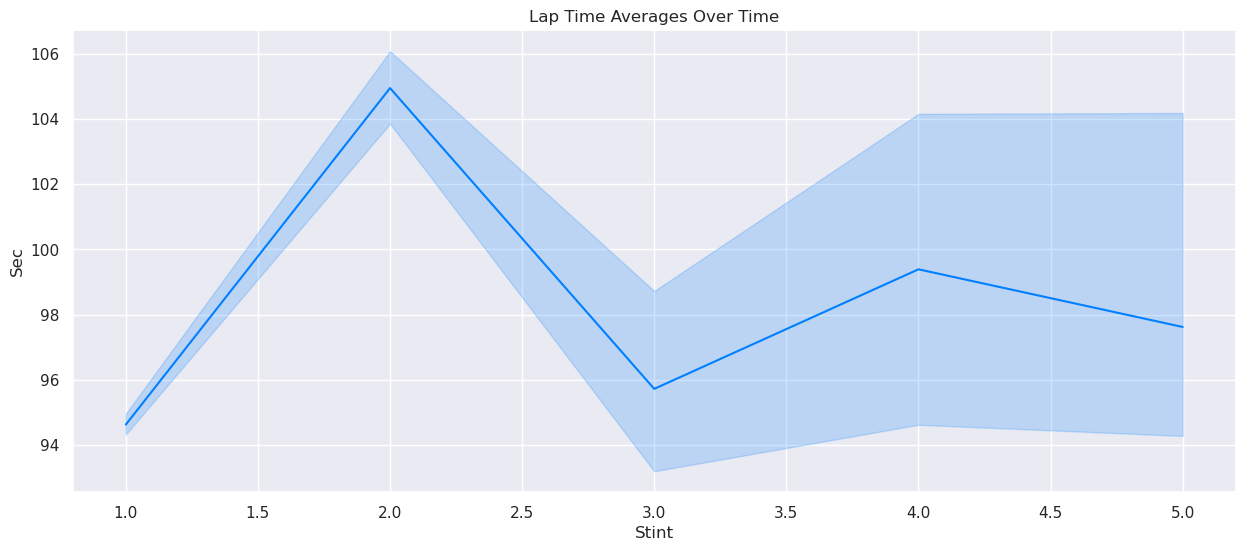

In [23]:
# British Grand Prix / Belgian Grand Prix / Austrian Grand Prix
lapsg = laps[laps["EventName"] == "British Grand Prix"][["Driver", "Stint", "LapTime"]].groupby(["Driver", "Stint"]).mean().reset_index()
# lapsg = lapsg[lapsg["Driver"] == "VER"]
lapsg["Sec"] = (lapsg['LapTime'].dt.minute * 60) + lapsg["LapTime"].dt.second + (lapsg["LapTime"].dt.microsecond / 1000000)
# lapsg.style.format({"LapTime": lambda t: t.strftime("%H:%M:%S.%f")})
# lapsg[lapsg["Driver"] == "VER"]
lapsg = lapsg[["Driver", "Stint", "Sec"]]
# lapsg.head(20)

# Graph the data
fig = plt.figure(figsize=(15,6))
gs = gridspec.GridSpec(1,1)
ax = fig.add_subplot(gs[0,0])
ax.set_title("Lap Time Averages Over Time")

# lapsg = lapsg[~lapsg["Driver"].isin(["LEC", "HUL", "MAG", "OCO", "PER"])]
# lapsg = lapsg[lapsg["Stint"] >= 2]

sns.lineplot(data=lapsg, x="Stint", y="Sec", ax=ax)

In [24]:
# Average Lap Times of Stints, Per Compound
# Delta time per tire compound between stints
# lapsg = laps[laps["Driver"] != "VER"]
# lapsg.style.format({"LapTime": lambda t: t.strftime("%H:%M:%S.%f")})
# lapsg["LapTime"] = pd.to_datetime(lapsg['LapTime'].astype(str), format='%H:%M:%S.%f')

lapsg = laps[["Compound", "Stint", "LapTime"]].groupby(["Compound", "Stint"]).mean()
# lapsg["LapTime"] = parse_laptime_ymdhms(lapsg["LapTime"])
print(lapsg.reset_index())

# Also need to do one within a single stint
# Also need to do this per driver and merge it on the base dataframe per driver

        Compound  Stint                       LapTime
0           HARD      1 1900-01-01 00:02:10.492716032
1           HARD      2 1900-01-01 00:01:27.717435136
2           HARD      3 1900-01-01 00:01:29.880985088
3           HARD      4 1900-01-01 00:01:36.136737792
4           HARD      5 1900-01-01 00:01:41.917999872
5   INTERMEDIATE      1 1900-01-01 00:01:33.395182592
6   INTERMEDIATE      2 1900-01-01 00:01:38.550026240
7   INTERMEDIATE      3 1900-01-01 00:01:39.045590016
8   INTERMEDIATE      4 1900-01-01 00:01:40.516187392
9         MEDIUM      1 1900-01-01 00:01:36.259094784
10        MEDIUM      2 1900-01-01 00:01:26.393216768
11        MEDIUM      3 1900-01-01 00:01:27.134567168
12        MEDIUM      4 1900-01-01 00:01:30.810089472
13        MEDIUM      5 1900-01-01 00:01:22.267521280
14          SOFT      1 1900-01-01 00:01:31.036210176
15          SOFT      2 1900-01-01 00:01:32.283817728
16          SOFT      3 1900-01-01 00:01:27.592833024
17          SOFT      4 1900

In [25]:
lapsg = laps[["Driver", "Stint", "LapTime"]].groupby(["Driver", "Stint"]).mean().reset_index().head(20)
lapsg#.style.format({"LapTime": lambda t: t.strftime("%H:%M:%S.%f")})
lapsg["LapTime"] = parse_laptime_ymdhms(lapsg["LapTime"])
lapsg.set_index("Driver")

,Stint,LapTime
Driver,,
ALB,1,01:46.4625
ALB,2,01:28.7669
ALB,3,01:29.1780
ALB,4,01:30.5131
ALB,5,01:23.2325
ALO,1,01:41.9816
ALO,2,01:28.7552
ALO,3,01:27.5936
ALO,4,01:36.6889


In [26]:
lapsg = laps[["Driver", "LapTime"]].groupby(["Driver"]).mean().reset_index().head(20)
lapsg["LapTime"] = parse_laptime_ymdhms(lapsg["LapTime"])
lapsg = lapsg.set_index("Driver")
lapsg

,LapTime
Driver,
ALB,01:32.2674
ALO,01:31.9387
BEA,01:36.0482
BOT,01:31.9780
GAS,01:32.2477
HAM,01:31.5130
HUL,01:30.2317
LEC,01:31.0552
MAG,01:30.5806


## Time Spent in Pits
Measure the total time spent in the pits by each driver during the races. Create visual representations to show how pit time varies across drivers and teams.

In [27]:
# Cells have alternating rows of InTime / OutTime, where the alternate is NaN in both cases.
# We want to combine them into one row to eventually calculate delta times.

pit_times = pits[(pits["PitInTime"].notna()) | (pits["PitOutTime"].notna())][["EventName", "Driver", "PitInTime", "PitOutTime", "ClassifiedPosition"]]

# Combining rows has proven to be a real pain in the ass so we're doing it manually

pit_times = pit_times.reset_index().drop(columns=["index"])
for idx in range(pit_times.shape[0]):
    if idx % 2 == 0:
        pit_times.iloc[idx]["PitOutTime"] = pit_times.iloc[idx+1]["PitOutTime"]
pit_times = pit_times.dropna()

# pit_times["PitTime"] = pit_times["PitOutTime"] - pit_times["PitInTime"]

# I don't know how time conversion works so I'm just shooting from the hip
# trying to get it into a format that's not horrible to work with
times = []
for t in pit_times["PitInTime"]:
    if type(t) == type("s"):
        a = t.split(" ")[2]
        if "." not in a:
            a += ".000000"
        times.append(a)
    else:
        times.append(np.nan)
pit_times["PitInTime"] = pd.to_datetime(times, format='%H:%M:%S.%f')

times = []
for t in pit_times["PitOutTime"]:
    if type(t) == type("s"):
        a = t.split(" ")[2]
        if "." not in a:
            a += ".000000"
        times.append(a)
    else:
        times.append(np.nan)
pit_times["PitOutTime"] = pd.to_datetime(times, format='%H:%M:%S.%f')

# Convert both of those columns from the string format to a datetime
pit_times["PitTime"] = pit_times["PitOutTime"] - pit_times["PitInTime"]
pit_times["PitOutTime"] = pit_times["PitOutTime"].dt.strftime('%H:%M:%S.%f').str[:-3]
pit_times["PitInTime"] = pit_times["PitInTime"].dt.strftime('%H:%M:%S.%f').str[:-3]
pit_times[["EventName", "Driver", "ClassifiedPosition", "PitTime"]]

,EventName,Driver,ClassifiedPosition,PitTime
0,Bahrain Grand Prix,VER,1,0 days 00:00:25.088000
2,Bahrain Grand Prix,VER,1,0 days 00:00:24.218000
4,Bahrain Grand Prix,PER,2,0 days 00:00:24.493000
6,Bahrain Grand Prix,PER,2,0 days 00:00:24.423000
8,Bahrain Grand Prix,SAI,3,0 days 00:00:24.580000
...,...,...,...,...
1098,Dutch Grand Prix,MAG,18,0 days 00:00:21.391000
1100,Dutch Grand Prix,BOT,19,0 days 00:00:20.739000
1102,Dutch Grand Prix,BOT,19,0 days 00:00:21.156000
1104,Dutch Grand Prix,ZHO,20,0 days 00:00:21.170000


# Reporting

## Per Race

In [28]:
# # Summary
# # Teams: XYZ
# # British Grand Prix / Belgian Grand Prix / Austrian Grand Prix

# # race = "Belgian Grand Prix"
# # team_rep = ' -- '.join(laps_raw[laps_raw["EventName"] == race].sort_values("Team")["Team"].unique())
# # print(team_rep)

# # # Drivers: XYZ
# # driver_rep = ' -- '.join(laps_raw[laps_raw["EventName"] == race].sort_values("Driver")["Driver"].unique())
# # print(driver_rep)

# # TOTALS
# # Pit Stops
# race = "Austrian Grand Prix"
# print("Pit Stops:  ", pit_stops[pit_stops["EventName"] == race][["PitStops"]].sum().iloc[0])
# # Pit Time
# print("Pit Time:  ", str(pit_times[pit_times["EventName"] == race]["PitTime"].sum())[7:-3])
# print("Laps Completed:", laps_raw.groupby(["EventName", "Driver"]).last().reset_index()[["EventName", "Driver", "LapNumber"]]["LapNumber"].sum())
# lapsg = laps_raw[laps_raw["EventName"] == race].groupby(["EventName", "Compound"]).count().reset_index()[["Compound", "Time"]]
# # lapsg = lapsg.set_index("Compound")
# print("Compound Usage:\n", lapsg.to_string(header=False, index=False))
# # Total lap time
# laps = laps_raw[laps_raw["EventName"] == race]
# laps = laps.groupby("EventName").sum()
# laps["LapTime"] = datetime.timedelta(seconds=laps["Sec"].iloc[0]) 
# laps = laps[["LapTime"]]
# print("Lap Time:", laps.to_string(header=False, index=False))

# # Lap time per stint
# laps = laps_raw[["EventName", "LapTime", "Stint", "Sec"]][laps_raw["EventName"] == race]
# laps = laps.groupby(["EventName", "Stint"]).sum().reset_index()[["Stint", "Sec"]]
# tot_sec = laps["Sec"].sum()
# laps["Pct"] = (laps["Sec"] / tot_sec * 100).astype(str).str[:5] + "%"
# for idx, item in enumerate(laps["Sec"]):
#     laps["Sec"].iloc[idx] = str(datetime.timedelta(seconds=item))[:-3]
#     laps["Sec"].iloc[idx] = laps["Sec"].iloc[idx].zfill(12)
# print("Time Per Stint:\n", laps.to_string(index=False, header=False))

# # Total Lap Times of Stints, Per Compound
# laps = laps_raw[laps_raw["EventName"] == race]
# laps = laps.groupby(["Compound", "Stint"]).sum().reset_index()[["Compound", "Stint", "Sec"]]
# for idx, item in enumerate(laps["Sec"]):
#     laps["Sec"].iloc[idx] = str(datetime.timedelta(seconds=item))[:-3].zfill(12)
# print("Time Per Stint, Per Compound:\n", laps.to_string(index=False, header=False))









# # AVERAGES
# print("\n================\n\nPit Stops:", pit_stops[pit_stops["EventName"] == race][["PitStops"]].mean().iloc[0])
# print("Pit Time:", str(pit_times[pit_times["EventName"] == race]["PitTime"].mean())[7:-6])
# print("Laps Completed:", laps_raw.groupby(["EventName", "Driver"]).last().reset_index()[["EventName", "Driver", "LapNumber"]]["LapNumber"].mean())
# lapsg = laps_raw[laps_raw["EventName"] == race].groupby(["Driver", "Compound"]).count().reset_index().groupby("Compound").mean().reset_index()[["Compound", "Time"]]

# # Graph bar chart
# print("Compound Usage:\n", lapsg.to_string(header=False, index=False))
# laps = laps_raw[["EventName", "Driver", "LapTimeDt"]].groupby(["EventName"]).mean().reset_index().sort_values("EventName")
# laps = laps[laps["EventName"] == race]
# laps["LapTime"] = parse_laptime_ymdhms(laps["LapTimeDt"])
# laps = laps.drop(columns=["LapTimeDt", "EventName"])
# # Avg lap time
# print("Lap Time:", laps.to_string(index=False, header=False))

# # Lap Time Per Stint
# # Graph
# laps = laps_raw[["EventName", "LapTime", "Stint", "Sec"]][laps_raw["EventName"] == race]
# laps = laps.groupby(["EventName", "Stint"]).mean().reset_index()[["Stint", "Sec"]]
# for idx, item in enumerate(laps["Sec"]):
#     laps["Sec"].iloc[idx] = str(datetime.timedelta(seconds=item))[:-3]
#     laps["Sec"].iloc[idx] = laps["Sec"].iloc[idx].zfill(12)
# print("Time Per Stint:\n", laps.to_string(index=False, header=False))

# # Average Lap Times of Stints, Per Compound
# # Graph 3var bar chart
# laps = laps_raw[laps_raw["EventName"] == race]
# laps["LapTime"] = convert_days_format_to_datetime(laps["LapTime"])
# laps = laps[["LapTime", "Stint", "Compound"]].groupby(["Compound", "Stint"]).mean().reset_index()
# laps["LapTime"] = parse_laptime_ymdhms(laps["LapTime"])
# print("Lap Time Of Stints Per Compound:\n", laps.to_string(header=False, index=False))

# # Graph of Lap Averages over time for this race
# lapsg = laps_raw[laps_raw["EventName"] == race][["Driver", "Stint", "LapTime", "Sec"]].groupby(["Driver", "Stint"]).mean().reset_index()

# fig = plt.figure(figsize=(15,6))
# gs = gridspec.GridSpec(1,1)
# ax = fig.add_subplot(gs[0,0])
# ax.set_title("Lap Time Averages Over Time")

# sns.lineplot(data=lapsg, x="Stint", y="Sec", ax=ax)





# # Placement for the race






# # Pit Stops
# # Per Team
# # Bar Graph

# # Per Driver
# # Bar Graph

# # Pit Time
# # Per Team
# # Bar Graph

# # Per Driver
# # Bar Graph

# # Laps Completed on each Tire Compound
# # Per Team
# # Red bull 	xxxxYYYYYYzzzzz 523
# # Team2	xxYYYYYzzzzzzzz 450

# # Per Driver
# # Driver1 xxxxxYYYYzzzz 89
# # Driver2 xxxYYYYYzzzzz 89

# # Average Lap Time Per Stint
# # Per Team
# #          	1         	2       	3       	4
# # Team
# # Team
# # Team
# # Team

# # Per Driver
# #          	1         	2       	3       	4
# # Team
# # Team
# # Team
# # Team




In [29]:
"""
Observation: Lap times increase/decrease

"""

'\nObservation: Lap times increase/decrease\n\n'

# Report Generation

### Global Relationships & Data

Global relationships represent averages and summaries. We identify them for posterity and to draw conclusions between how the global understanding compares to individual races. Importantly, we often see discrepencies between globally-scoped data and race-scoped data, where assumptions and key takeaways & correlations turn out to be not true for specific races or situations.

#### Global Compound Representation

Text(0.5, 1.0, 'Total Compound Representation')

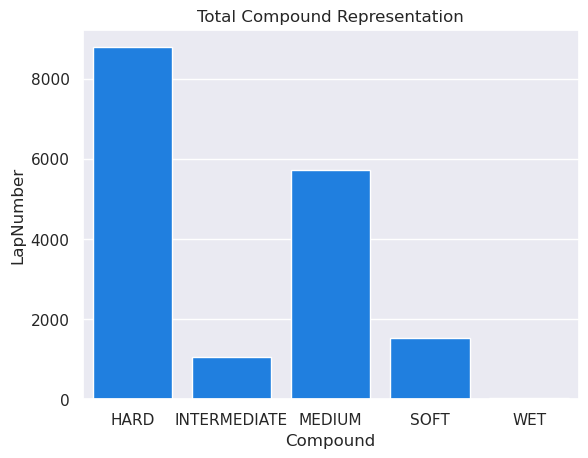

In [30]:
lapsgg = laps_raw.groupby("Compound").count()[["LapNumber"]].reset_index()
g = sns.barplot(data=lapsgg, x="Compound", y="LapNumber");
g.set_title("Total Compound Representation")

#### Relationship 1 - Tire Compound Choice vs Lap Time

Task: Investigate how different tire compounds (e.g., Soft, Medium, Hard) correlate with lap times throughout the race.

Objective: Identify which tire compounds lead to faster lap times and whether this varies depending on the stint or race phase.

---

In [31]:
# Graph 3var bar chart
laps = laps_raw[["LapTime", "Stint", "Compound"]]
laps["LapTime"] = convert_days_format_to_datetime(laps["LapTime"])
laps = laps[["LapTime", "Stint", "Compound"]].groupby(["Compound", "Stint"]).mean().reset_index()
laps["LapTime"] = parse_laptime_ymdhms(laps["LapTime"])
# laps

Text(0.5, 1.0, 'Average Time Spent On Each Stint, Per Compound')

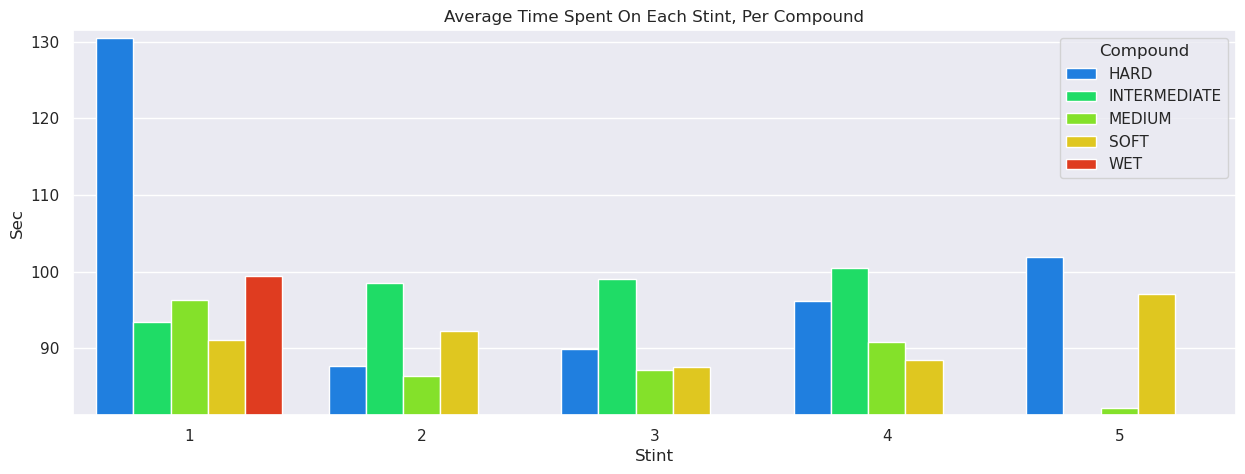

In [32]:
data = []
for i in laps["LapTime"]:
    i = i.split(":")
    data.append( (float(i[0]) * 60) + float(i[1]) )
laps["Sec"] = data
fig = plt.figure(figsize=(15,5))
g = sns.barplot(x="Stint", y="Sec", hue="Compound", data=laps)
plt.ylim(laps["Sec"].min() - 1, laps["Sec"].max() + 1)
g.set_title("Average Time Spent On Each Stint, Per Compound")

* Most races have 2 - 3 stints. Stints 4 and 5 are more rare and don't have a significant representation in the ecosystem
* HARD tires see a significant increase in time on stint 1, and from stint 2 onwards finds a steady increase in time
    * The spike in stint 1 time is likely due to either a large use of HARD tires on longer tracks (skewing the data towards longer times) or a tendency for HARD tires to suffer significantly from lack of initial wear / a lack of rubbered-in track.
* INTERMEDIATE tires see a small increase in time over stints
* MEDIUM tires see a similar trend to hard tires
* SOFT tires see a general decrease in times

#### Relationship 2 - Starting Tire Type vs Final Classification

Task: Explore how starting the race on different tire compounds (Hard, Soft, Medium) impacts the final classification.

Objective: Understand whether the initial tire choice plays a significant role in determining race outcomes.

In [33]:
lapsg = laps_raw[laps_raw["Stint"] == 1].merge(results_raw[["EventName", "Abbreviation", "ClassifiedPosition"]], \
                                left_on=["EventName", "Driver"], right_on=["EventName", "Abbreviation"])
lapsg = lapsg[pd.to_numeric(lapsg['ClassifiedPosition'], errors='coerce').notnull()]
lapsg["ClassifiedPosition"] = lapsg["ClassifiedPosition"].astype(int)
lapsg = lapsg[["Compound", "Position", "ClassifiedPosition", "TyreLife"]]
lapsg = lapsg.groupby("Compound").mean()[["Position", "ClassifiedPosition", "TyreLife"]].reset_index()
lapsgg = lapsg.melt(id_vars=["Compound"], value_vars=["ClassifiedPosition", "TyreLife"])
lapsg

,Compound,Position,ClassifiedPosition,TyreLife
0,HARD,12.0939,12.3263,14.3756
1,INTERMEDIATE,8.9501,8.1286,16.1680
2,MEDIUM,7.9200,8.4001,11.5518
3,SOFT,10.3356,10.8049,8.4857
4,WET,8.0000,11.3684,5.5789


In [34]:
"""
Observation:
Position > Class goes UP (lose rank) on HARD
Position > Class goes DOWN (gain rank) on INTERMEDIATE
Position > Class goes UP (lose rank
Stays the same on MED

With MED as a baseline:
Soft gains ~4.375 positions, loses ~2 laps of tyre life
Hard loses ~2.3 positions, gains 6 laps of tyre life
"""

'\nObservation:\nPosition > Class goes UP (lose rank) on HARD\nPosition > Class goes DOWN (gain rank) on INTERMEDIATE\nPosition > Class goes UP (lose rank\nStays the same on MED\n\nWith MED as a baseline:\nSoft gains ~4.375 positions, loses ~2 laps of tyre life\nHard loses ~2.3 positions, gains 6 laps of tyre life\n'

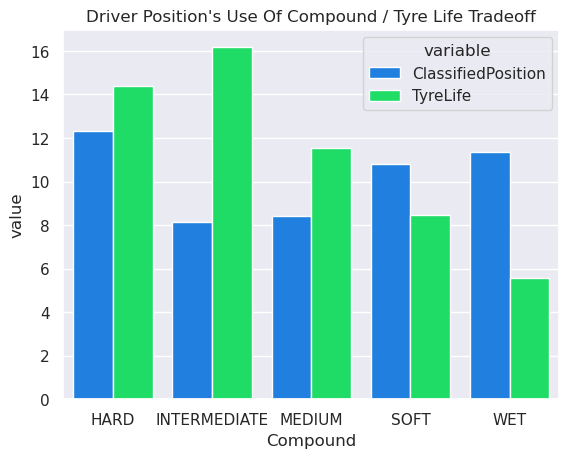

In [35]:
# Stolen from https://stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

# lapsgg = lapsgg.rename(columns={"value": "ClassifiedPosition"})
g = sns.barplot(data=lapsgg, x="Compound", y="value", hue="variable")#, palette=colors_from_values(lapsgg["value"], "Blues_r"))
g.set_title("Driver Position's Use Of Compound / Tyre Life Tradeoff");

#### Relationship 3 - Number of Laps on a Compound vs Delta Time

We choose to represent this per-race instead of globally because the delta times between laps on a single set of tires is usually +-1second which averages out to about zero over  all races, suggesting there is no correlation between laps on a tire / lap time, which is incorrect.

#### Relationship 3.5 - Lap Times Over A Stint

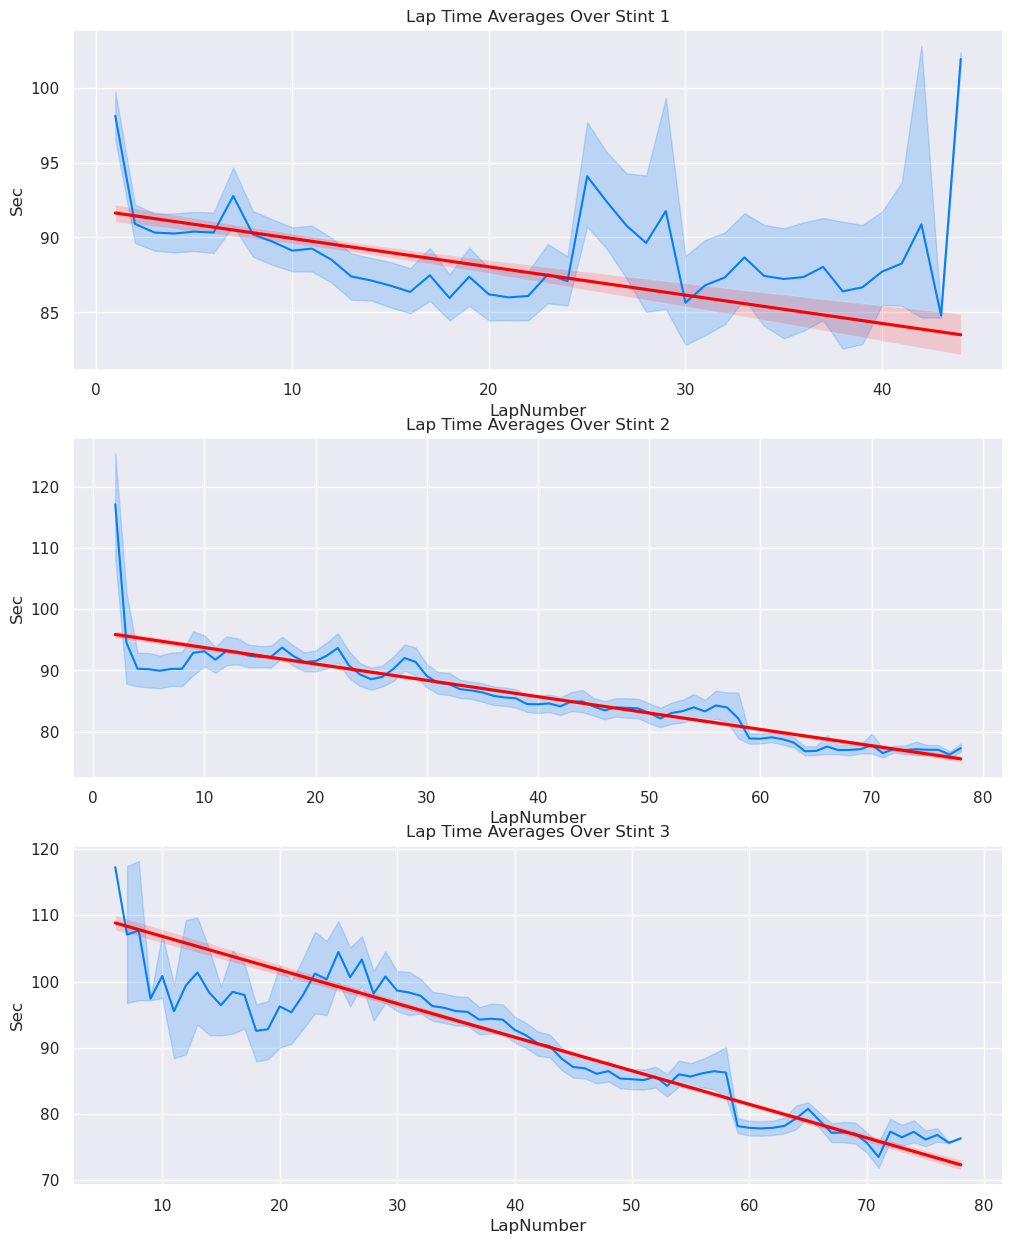

In [36]:
lapsg = laps_raw[["Driver", "Sec", "LapNumber", "Stint"]]
lapsg = lapsg[lapsg["Sec"] < lapsg["Sec"].quantile(0.99)]
lapsg = lapsg.groupby(["Driver", "Stint"]).apply(lambda x: x.iloc[1:-1])
fig = plt.figure(figsize=(12,15))
gs = gridspec.GridSpec(3,1, hspace=0.20)#, right=0.48, wspace=0.05)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[2,0])

ax1.set_title("Lap Time Averages Over Stint 1")
ax2.set_title("Lap Time Averages Over Stint 2")
ax3.set_title("Lap Time Averages Over Stint 3")


sns.lineplot(data=lapsg[lapsg["Stint"] == 1], y="Sec", x="LapNumber", ax=ax1)
sns.lineplot(data=lapsg[lapsg["Stint"] == 2], y="Sec", x="LapNumber", ax=ax2)
sns.lineplot(data=lapsg[lapsg["Stint"] == 3], y="Sec", x="LapNumber", ax=ax3)

sns.regplot(y="Sec", x="LapNumber", data=lapsg[lapsg["Stint"] == 1], ax=ax1, scatter=False, color="Red");
sns.regplot(y="Sec", x="LapNumber", data=lapsg[lapsg["Stint"] == 2], ax=ax2, scatter=False, color="Red");
sns.regplot(y="Sec", x="LapNumber", data=lapsg[lapsg["Stint"] == 3], ax=ax3, scatter=False, color="Red");

The global representation of this data is a little fuzzy, because it suggests that there exists 1 or more stints containing 70 or more laps, which tends not to be the case. We consider this type of data an outlier, although the general trend still shows that over time, lap times decrease within a stint.

This is actually a bad visualization because none of the data here is normalized - tracks each have their own average lap times and lengths which make  a "global trend" kind of meaningless, despite the above graph. It's more accurate to represent each race individually since the lap splits are dependent on so many variables, including weather, driver skill, or individual race strategy. As such, you can't conclude a global phenomenon of track times decreasing just from this data alone. A more accurate graph, like the following, shows this discrepancy:

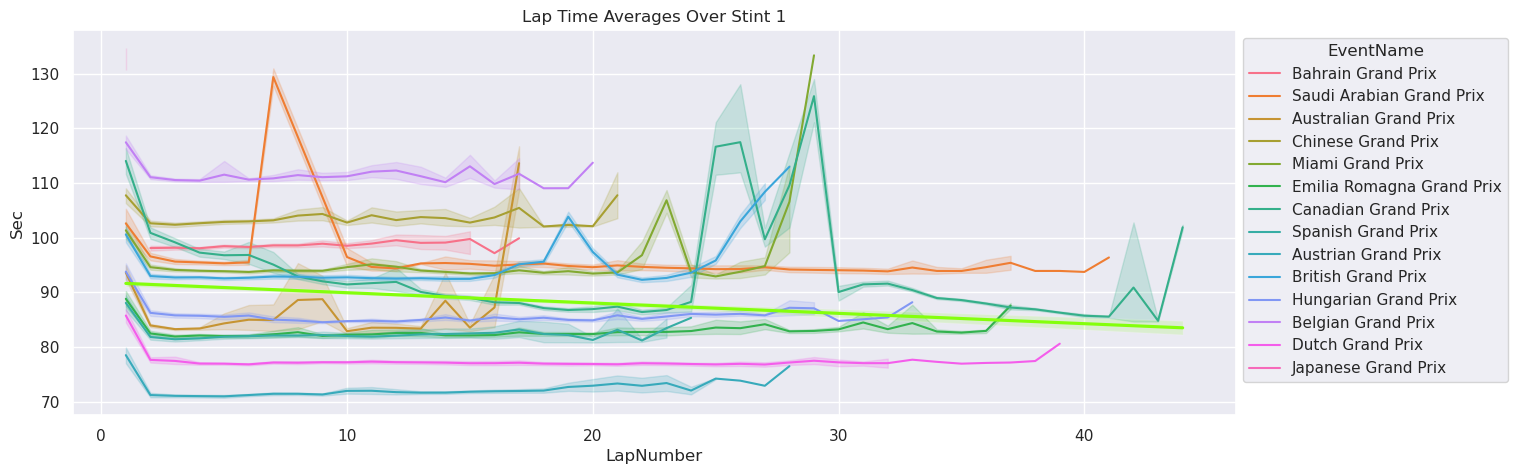

In [37]:
lapsg = laps_raw[["Driver", "Sec", "LapNumber", "Stint", "EventName"]]
lapsg = lapsg[lapsg["Sec"] < lapsg["Sec"].quantile(0.99)]
lapsg = lapsg.groupby(["Driver", "Stint"]).apply(lambda x: x.iloc[1:-1])
fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(1,1, hspace=0.20)#, right=0.48, wspace=0.05)
ax1 = fig.add_subplot(gs[0,0])

ax1.set_title("Lap Time Averages Over Stint 1")

sns.lineplot(data=lapsg[lapsg["Stint"] == 1], y="Sec", x="LapNumber", hue="EventName", ax=ax1)
sns.regplot(y="Sec", x="LapNumber", data=lapsg[lapsg["Stint"] == 1], ax=ax1, scatter=False);
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))

Most of the lines here are relatively flat (some actually increase) suggesting both that lap times increase with time AND decrease with time... but certain tracks bring this average way up or way down. So we'll explore these times per-race instead of as a global phenomenon.

#### Relationship 4 - Number of Stops vs Final Position

Task: Analyze the relationship between the number of pit stops a driver makes and their final position in the race.

Objective: Understand how the frequency of pit stops impacts race outcomes, particularly whether fewer or more stops lead to better results.

,ClassifiedPosition,PitStops
ClassifiedPosition,1.0000,0.2704
PitStops,0.2704,1.0000


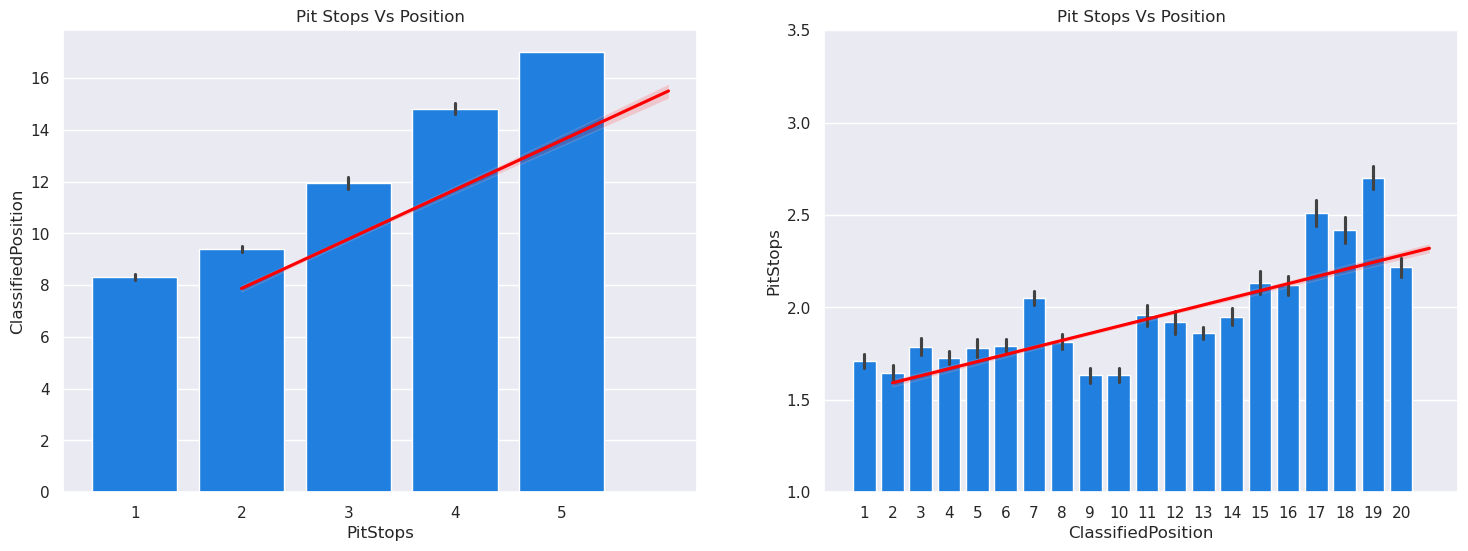

In [38]:
lapsg = laps_raw.merge(results_raw[["EventName", "Abbreviation", "ClassifiedPosition"]], \
                                left_on=["EventName", "Driver"], right_on=["EventName", "Abbreviation"])
lapsg = lapsg[pd.to_numeric(lapsg['ClassifiedPosition'], errors='coerce').notnull()]
lapsg["ClassifiedPosition"] = lapsg["ClassifiedPosition"].astype(int)
lapsg = pd.merge(left=lapsg, right=pit_stops, left_on=["EventName", "Driver"], right_on=["EventName", "Driver"])
lapsg = lapsg[["EventName", "Driver", "Stint", "ClassifiedPosition", "PitStops"]]

fig = plt.figure(figsize=(18,6))
gs = gridspec.GridSpec(1,2)#, right=0.48, wspace=0.05)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

ax1.set_title("Pit Stops Vs Position")
ax2.set_title("Pit Stops Vs Position")

plt.ylim(bottom=1, top=3.5)
sns.barplot(data=lapsg, x="PitStops", y="ClassifiedPosition", ax=ax1)
sns.barplot(data=lapsg, y="PitStops", x="ClassifiedPosition", ax=ax2)
sns.regplot(y="ClassifiedPosition", x="PitStops", data=lapsg, ax=ax1, scatter=False, color="Red")
sns.regplot(x="ClassifiedPosition", y="PitStops", data=lapsg, ax=ax2, scatter=False, color="Red")
lapsg[["ClassifiedPosition", "PitStops"]].corr()

* General trend: Fewer pit stops results in a better final position
    * We identify later that this is not true for every race, suggesting that the deviation of strategy within individual races and even indvidual teams and drivers, influence this metric significantly.

#### Relationship 5 - Race Length vs Strategy

Task: Examine how the total number of laps in each race influenced the pit stop strategy and tire choices for teams and drivers.

Objective: Understand how race length affects strategic decisions, particularly in terms of the number of stops and tire choices.

In [39]:
total_laps = laps_raw[["EventName", "LapNumber"]].groupby(["EventName"]).last().reset_index()
total_laps = total_laps.rename(columns={"LapNumber":"TotalLaps"})
# total_laps

,PitStops,TotalLaps
PitStops,1.0000,0.0674
TotalLaps,0.0674,1.0000


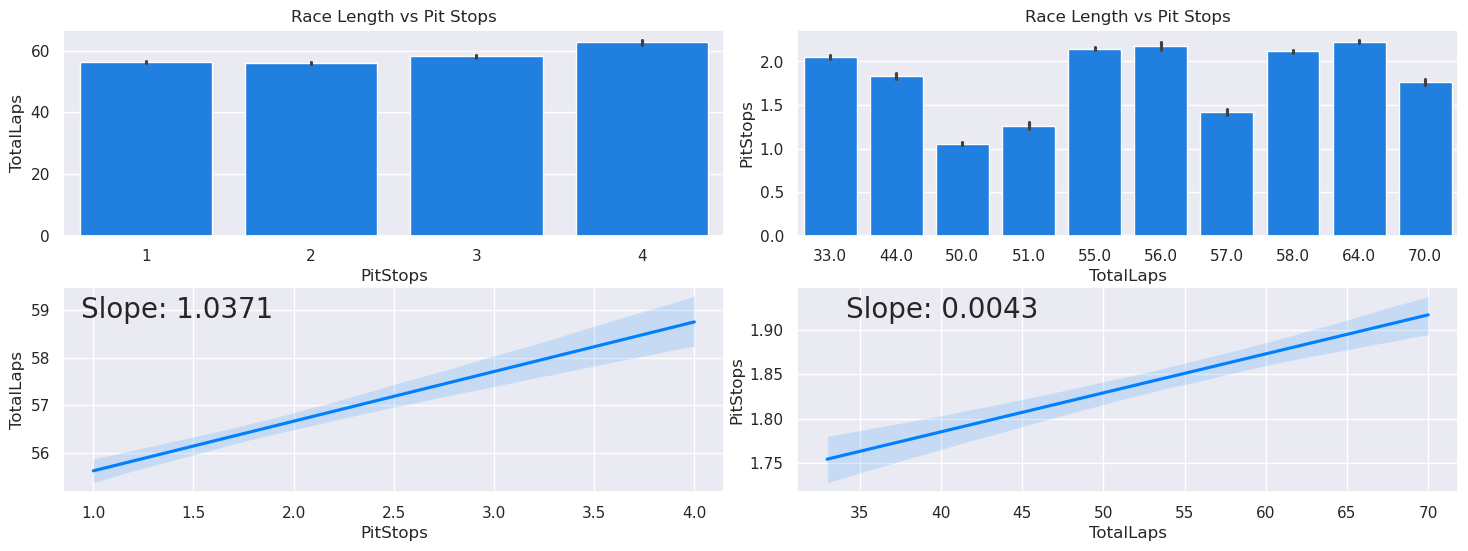

In [40]:
# Yes I'm aware I'm copying code - shut up about it
# This is mostly an internal monologue between me and myself

import scipy

lapsg = laps_raw.merge(results_raw[["EventName", "Abbreviation", "ClassifiedPosition"]], \
                                left_on=["EventName", "Driver"], right_on=["EventName", "Abbreviation"])
lapsg = lapsg.merge(total_laps, on="EventName") 
lapsg = lapsg[pd.to_numeric(lapsg['ClassifiedPosition'], errors='coerce').notnull()]
lapsg["ClassifiedPosition"] = lapsg["ClassifiedPosition"].astype(int)
lapsg = pd.merge(left=lapsg, right=pit_stops, left_on=["EventName", "Driver"], right_on=["EventName", "Driver"])
lapsg = lapsg[["EventName", "Driver", "PitStops", "TotalLaps"]]
# lapsg.drop_duplicates()
lapsg = lapsg[lapsg["TotalLaps"] > lapsg["TotalLaps"].quantile(0.05)]

# Relationship between race length and total pit stops
fig = plt.figure(figsize=(18,6))
gs = gridspec.GridSpec(2,2, hspace=0.25, wspace=0.11)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

ax1.set_title("Race Length vs Pit Stops")
ax2.set_title("Race Length vs Pit Stops")
sns.barplot(data=lapsg, x="PitStops", y="TotalLaps", ax=ax1)
sns.barplot(data=lapsg, y="PitStops", x="TotalLaps", ax=ax2)
g1 = sns.regplot(y="TotalLaps", x="PitStops", data=lapsg, ax=ax3, scatter=False)
g2 = sns.regplot(x="TotalLaps", y="PitStops", data=lapsg, ax=ax4, scatter=False)

slope1, _,_,_,_ = scipy.stats.linregress(x=g1.get_lines()[0].get_xdata(),y=g1.get_lines()[0].get_ydata())
slope2, _,_,_,_ = scipy.stats.linregress(x=g2.get_lines()[0].get_xdata(),y=g2.get_lines()[0].get_ydata())
plt.figtext(0.135,0.4, "Slope: " + str(slope1)[:6],size=20)
plt.figtext(0.56,0.4, "Slope: " + str(slope2)[:6],size=20);
lapsg[["PitStops", "TotalLaps"]].corr()

Text(0.5, 1.0, 'Compound Usage Based on Total Laps & Stints')

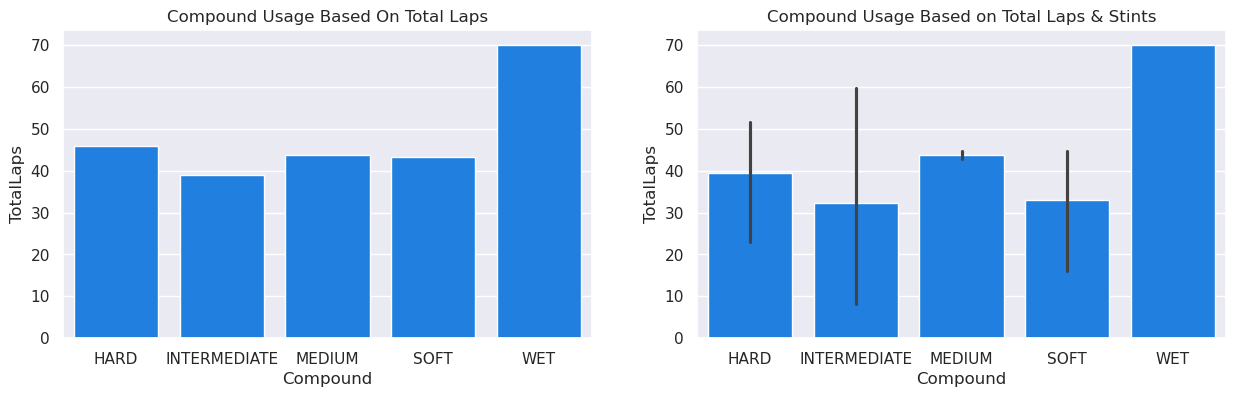

In [41]:
# How does total lap number affect compound usage?

lapsg = laps_raw.merge(results_raw[["EventName", "Abbreviation", "ClassifiedPosition"]], \
                                left_on=["EventName", "Driver"], right_on=["EventName", "Abbreviation"])
lapsg = lapsg.merge(total_laps, on="EventName") 
lapsg = lapsg[pd.to_numeric(lapsg['ClassifiedPosition'], errors='coerce').notnull()]
lapsg["ClassifiedPosition"] = lapsg["ClassifiedPosition"].astype(int)
lapsg = pd.merge(left=lapsg, right=pit_stops, left_on=["EventName", "Driver"], right_on=["EventName", "Driver"])
lapsg = lapsg[["EventName", "Driver", "PitStops", "TotalLaps", "Compound", "Stint"]]


fig = plt.figure(figsize=(15,4))
gs = gridspec.GridSpec(1,2, wspace=0.20)#, right=0.48, wspace=0.05)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

sns.set_palette('Paired')

lapsgg = lapsg.drop_duplicates()[["Compound", "TotalLaps", "Stint"]].groupby(["Compound"]).mean().reset_index()
g = sns.barplot(data=lapsgg, x="Compound", y="TotalLaps", ax=ax1)
g.set_title("Compound Usage Based On Total Laps")

lapsgg = lapsg.drop_duplicates()[["Compound", "TotalLaps", "Stint"]].groupby(["Compound", "Stint"]).mean().reset_index()
g = sns.barplot(data=lapsgg, x="Compound", y="TotalLaps", ax=ax2)
g.set_title("Compound Usage Based on Total Laps & Stints")

# lapsg

* On average, all compounds are used approximately the same regardless of total lap count
* In practice, compound usage is based on stints, providing a range of use cases
    * HARD compounds are used more often on tracks between 25-52 total laps
    * INTERMEDIATE compounds are used more often on tracks between 8-62 laps (so almost always)
    * MEDIUM compounds are used most often on tracks around 45 laps
        * The lack of lap-range suggests MEDIUM tires are used in niche cases, and broader strategies involve some combination of SOFT/MEDIUM/HARD
    * SOFT compounds are used most often on tracks between 18-44 laps
    * WET compounds are used when it rains
        * On wet days, everyone is probably using WET tires, hence the small distribution

#### Relationship 6 Bonus: What compounds do certain positions tend to use?

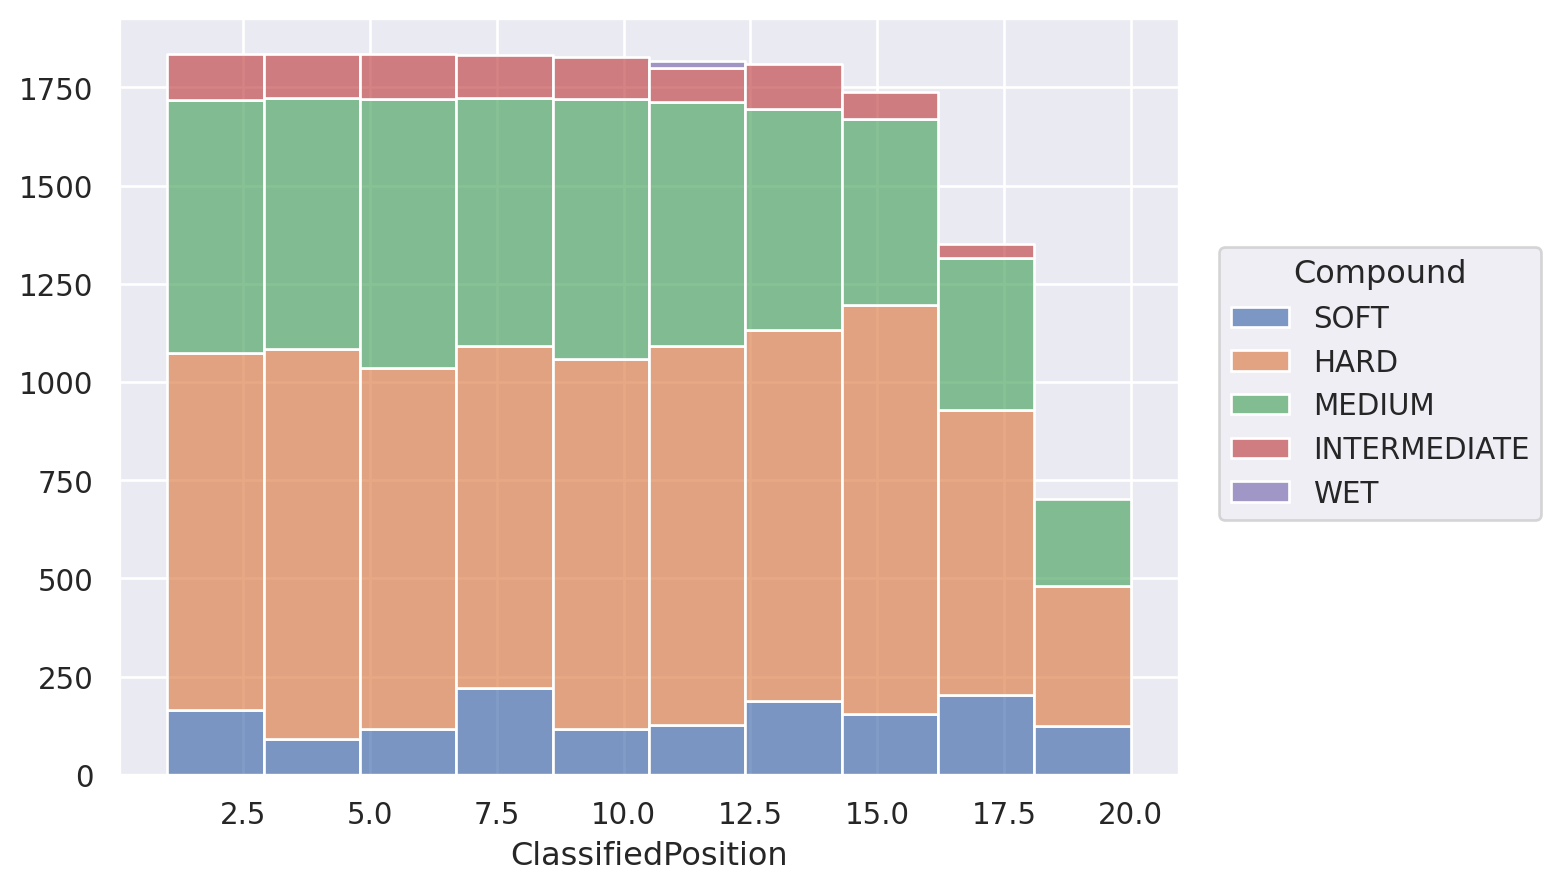

In [42]:
lapsg = laps_raw.merge(results_raw[["EventName", "Abbreviation", "ClassifiedPosition"]], \
                                left_on=["EventName", "Driver"], right_on=["EventName", "Abbreviation"])
lapsg = lapsg[pd.to_numeric(lapsg['ClassifiedPosition'], errors='coerce').notnull()]
lapsg["ClassifiedPosition"] = lapsg["ClassifiedPosition"].astype(int)
lapsg = pd.merge(left=lapsg, right=pit_stops, left_on=["EventName", "Driver"], right_on=["EventName", "Driver"])
lapsg = lapsg[["EventName", "Driver", "Stint", "ClassifiedPosition", "PitStops", "LapNumber", "Compound"]]
# lapsg.drop_duplicates()
so.Plot(lapsg, x="ClassifiedPosition", color="Compound") \
        .add(so.Bars(), so.Hist(bins=10), so.Stack())

### Per Race:

#### Teams

In [43]:
race = "Belgian Grand Prix"
# team_rep = ' -- '.join(laps_raw[laps_raw["EventName"] == race].sort_values("Team")["Team"].unique())
# print(team_rep)
# # Drivers: XYZ
# driver_rep = ' -- '.join(laps_raw[laps_raw["EventName"] == race].sort_values("Driver")["Driver"].unique())
# print(driver_rep)
laps = laps_raw[laps_raw["EventName"] == race][["Team", "Driver"]].drop_duplicates().sort_values("Team").set_index("Team")
laps.pivot_table(index="Team", values=["Driver"], aggfunc=lambda x: ", ".join(x)).rename(columns={"Driver":""})

,
Team,
Alpine,"OCO, GAS"
Aston Martin,"ALO, STR"
Ferrari,"LEC, SAI"
Haas F1 Team,"HUL, MAG"
Kick Sauber,"BOT, ZHO"
McLaren,"PIA, NOR"
Mercedes,"HAM, RUS"
RB,"TSU, RIC"
Red Bull Racing,"PER, VER"


In [44]:
laps_raw[laps_raw["EventName"] == race][["Driver", "LapNumber"]].groupby(["Driver"]).last().median().iloc[0]

44.0

#### Lap Time Graph

<Axes: title={'center': 'Lap Time Averages Over Time'}, xlabel='Stint', ylabel='Sec'>

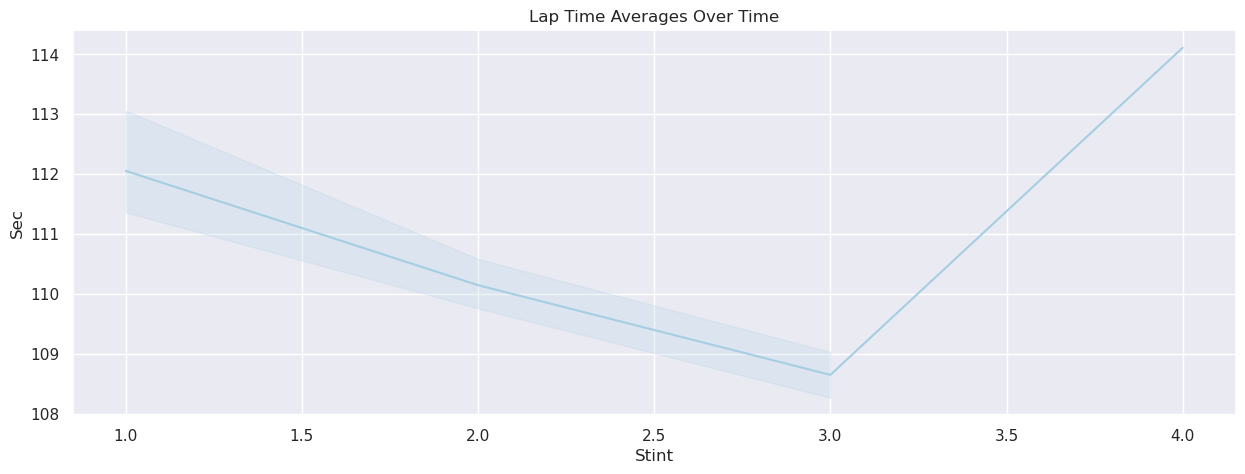

In [82]:
lapsg = laps_raw[laps_raw["EventName"] == race][["Driver", "Stint", "Sec"]] \
        .groupby(["Driver", "Stint"]).mean().reset_index()

fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(1,1)
ax = fig.add_subplot(gs[0,0])
ax.set_title("Lap Time Averages Over Time")

sns.lineplot(data=lapsg, x="Stint", y="Sec", ax=ax, palette="gist_ncar")

### Race - Total Statistics

#### Summary Table

In [46]:
# Lap Time, Total
laps = laps_raw[laps_raw["EventName"] == race]
laps = laps[["EventName", "LapNumber", "Sec"]].groupby("EventName").sum()
laps["LapTime"] = datetime.timedelta(seconds=laps["Sec"].iloc[0]) 
laps = laps[["LapTime"]]

d_total = {
    "Pit Stops":[pit_stops[pit_stops["EventName"] == race][["PitStops"]].sum().iloc[0]],
    "Pit Time":[str(pit_times[pit_times["EventName"] == race]["PitTime"].sum())[7:-3]],
    "Laps Completed":[laps_raw.groupby(["EventName", "Driver"]).last().reset_index()[["EventName", "Driver", "LapNumber"]]["LapNumber"].sum()],
    "Lap Time":[laps.to_string(header=False, index=False)],
}
df_total = pd.DataFrame(d_total).T
df_total.columns = [""]
df_total

,
Pit Stops,34
Pit Time,00:12:41.939
Laps Completed,17123.0000
Lap Time,1 days 01:40:52.667000


#### Total Lap Time Per Stint

In [47]:
# Lap time per stint
laps = laps_raw[["EventName", "LapTime", "Stint", "Sec"]][laps_raw["EventName"] == race]
laps = laps.groupby(["EventName", "Stint"]).sum().reset_index()[["Stint", "Sec"]]
tot_sec = laps["Sec"].sum()
laps["Pct"] = (laps["Sec"] / tot_sec * 100).astype(str).str[:5] + "%"
for idx, item in enumerate(laps["Sec"]):
    laps["Sec"].iloc[idx] = str(datetime.timedelta(seconds=item))[:-3]
    laps["Sec"].iloc[idx] = laps["Sec"].iloc[idx].zfill(12)
#print("Time Per Stint:\n", laps.to_string(index=False, header=False))
laps

,Stint,Sec,Pct
0,1,06:56:54.539,27.05%
1,2,11:14:28.022,43.77%
2,3,07:25:41.882,28.92%
3,4,00:03:48.224,0.246%


Text(0.5, 1.0, '% of Total Race Time Per Stint')

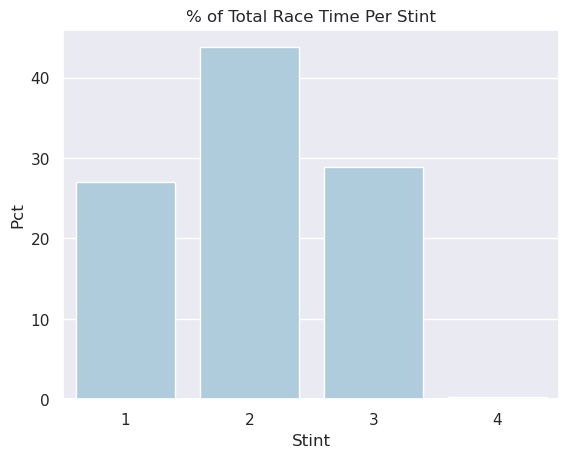

In [48]:
laps["Pct"] = laps["Pct"].str[:-1].astype(float)
g = sns.barplot(data=laps, x="Stint", y="Pct")
g.set_title("% of Total Race Time Per Stint")

#### Total Lap Time Per Stint, Per Compound

In [49]:
# Total Lap Times of Stints, Per Compound
laps = laps_raw[laps_raw["EventName"] == race]
laps = laps.groupby(["Stint", "Compound"])[["Time", "Sec"]].sum().reset_index()
for idx, item in enumerate(laps["Sec"]):
    laps["Sec"].iloc[idx] = str(datetime.timedelta(seconds=item))[:-3].zfill(12)
# print("Time Per Stint, Per Compound:\n", laps.to_string(index=False, header=False))
laps

,Stint,Compound,Time,Sec
0,1,HARD,0 days 00:57:10.3710000 days 00:59:00.6310000 ...,00:44:43.988
1,1,MEDIUM,0 days 00:57:07.8010000 days 00:58:57.6500000 ...,05:57:09.665
2,1,SOFT,0 days 00:57:14.3570000 days 00:59:05.8980000 ...,00:15:00.886
3,2,HARD,0 days 01:17:33.1410000 days 01:19:21.3450000 ...,09:19:31.469
4,2,MEDIUM,0 days 01:34:02.4940000 days 01:35:50.4220000 ...,01:54:56.553
5,3,HARD,0 days 01:44:52.0580000 days 01:46:39.4540000 ...,05:56:30.079
6,3,MEDIUM,0 days 01:48:37.6270000 days 01:50:24.0740000 ...,01:29:11.803
7,4,SOFT,0 days 02:14:10.6350000 days 02:15:55.336000,00:03:48.224


Text(0.5, 1.0, 'Total Time Spent On Each Stint, Per Compound')

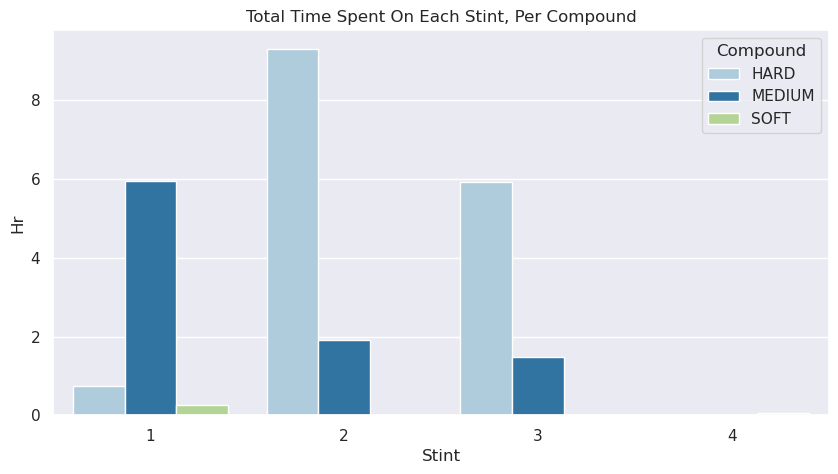

In [50]:
data = []
for i in laps["Sec"]:
    i = i.split(":")
    data.append( (float(i[0]) * 60) + float(i[1]) )
laps["Min"] = data
laps["Hr"] = [x / 60 for x in data]
fig = plt.figure(figsize=(10,5))
g = sns.barplot(x="Stint", y="Hr", hue="Compound", data=laps)
# plt.ylim(laps["Min"].min() - 1, laps["Min"].max() + 1)
g.set_title("Total Time Spent On Each Stint, Per Compound")

#### Total Compound Usage

In [51]:
# Compound Usage, Total
lapsg = laps_raw[laps_raw["EventName"] == race].groupby(["EventName", "Compound"]).count().reset_index()[["Compound", "LapNumber"]]
# print("Compound Usage:\n", lapsg.to_string(header=False, index=False))
lapsg

,Compound,LapNumber
0,HARD,528
1,MEDIUM,303
2,SOFT,10


Text(0.5, 1.0, 'Total Laps on Each Compound')

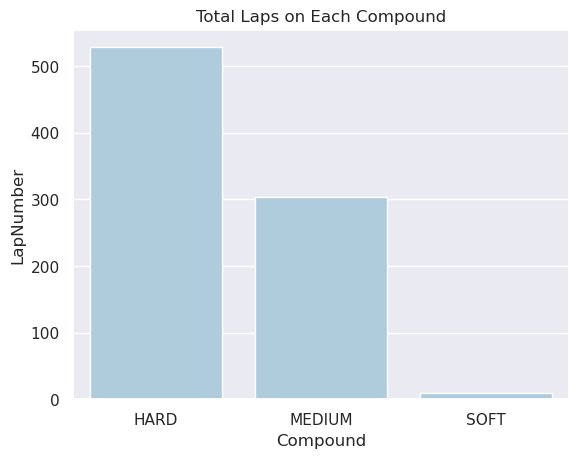

In [52]:
g = sns.barplot(data=lapsg, x="Compound", y="LapNumber")
g.set_title("Total Laps on Each Compound")

### Race - Average Statistics

#### Summary Table

In [53]:
# Lap Time, Average
laps = laps_raw[laps_raw["EventName"] == race]
laps = laps[["EventName", "LapNumber", "Sec"]].groupby("EventName").mean()
laps["LapTime"] = datetime.timedelta(seconds=laps["Sec"].iloc[0])
# laps["LapTime"] = convert_days_format_to_datetime(laps["LapTime"])
laps = laps[["LapTime"]]

d_avg = {
    "Pit Stops":[pit_stops[pit_stops["EventName"] == race][["PitStops"]].mean().iloc[0]],
    "Pit Time":[str(pit_times[pit_times["EventName"] == race]["PitTime"].mean())[7:-3]],
    "Laps Completed":[laps_raw.groupby(["EventName", "Driver"]).last().reset_index()["LapNumber"].mean()],
    "Lap Time":[laps.to_string(header=False, index=False)[7:]],
}
df_avg = pd.DataFrame(d_avg).T
df_avg.columns = [""]
df_avg

,
Pit Stops,1.7895
Pit Time,00:00:23.089060
Laps Completed,57.2676
Lap Time,00:01:50.062699


In [54]:
# # AVERAGES
# print("\n================\n\nPit Stops:", )
# print("Pit Time:", )
# print("Laps Completed:", )

# # Average Lap Time
# laps = laps_raw[["EventName", "LapTimeDt"]].groupby(["EventName"]).mean().reset_index().sort_values("EventName")
# laps = laps[laps["EventName"] == race]
# laps["LapTime"] = parse_laptime_ymdhms(laps["LapTimeDt"])
# laps = laps.drop(columns=["LapTimeDt", "EventName"])
# print("Lap Time:", laps.to_string(index=False, header=False))


#### Average Lap Time Per Stint

In [55]:
# Graph
laps = laps_raw[["EventName", "LapTime", "Stint", "Sec"]][laps_raw["EventName"] == race]
laps = laps[["EventName", "Stint", "Sec"]].groupby(["EventName", "Stint"]).mean().reset_index()
for idx, item in enumerate(laps["Sec"]):
    laps["Sec"].iloc[idx] = str(datetime.timedelta(seconds=item))[:-3]
    laps["Sec"].iloc[idx] = laps["Sec"].iloc[idx].zfill(12)
laps

,EventName,Stint,Sec
0,Belgian Grand Prix,1,00:01:51.672
1,Belgian Grand Prix,2,00:01:49.967
2,Belgian Grand Prix,3,00:01:48.706
3,Belgian Grand Prix,4,00:01:54.112


(107.706, 115.112)

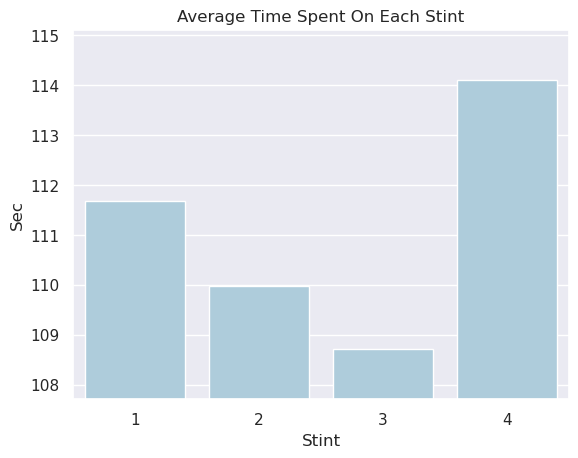

In [56]:
data = []
for i in laps["Sec"]:
    i = i.split(":")
    data.append( (int(i[1]) * 60) + float(i[2]) )
laps["Sec"] = data
g = sns.barplot(data=laps, x="Stint", y="Sec")
g.set_title("Average Time Spent On Each Stint")
plt.ylim(laps["Sec"].min() - 1, laps["Sec"].max() + 1)

#### Average Lap Time Per Stint, Per Compound // Relationship 1

In [57]:
# Graph 3var bar chart
laps = laps_raw[laps_raw["EventName"] == race]
laps["LapTime"] = convert_days_format_to_datetime(laps["LapTime"])
laps = laps[["LapTime", "Stint", "Compound"]].groupby(["Compound", "Stint"]).mean().reset_index()
laps["LapTime"] = parse_laptime_ymdhms(laps["LapTime"])
laps

,Compound,Stint,LapTime
0,HARD,1,01:51.8328
1,HARD,2,01:49.7106
2,HARD,3,01:48.5790
3,MEDIUM,1,01:51.6128
4,MEDIUM,2,01:51.2347
5,MEDIUM,3,01:49.2204
6,SOFT,1,01:52.6107
7,SOFT,4,01:54.1120


Text(0.5, 1.0, 'Average Time Spent On Each Stint, Per Compound')

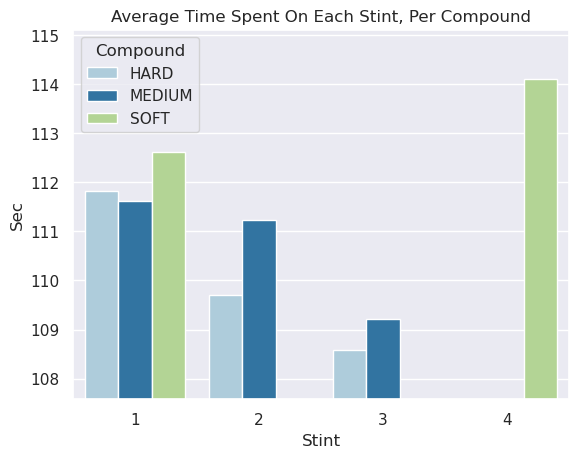

In [58]:
data = []
for i in laps["LapTime"]:
    i = i.split(":")
    data.append( (float(i[0]) * 60) + float(i[1]) )
laps["Sec"] = data
g = sns.barplot(x="Stint", y="Sec", hue="Compound", data=laps)
plt.ylim(laps["Sec"].min() - 1, laps["Sec"].max() + 1)
g.set_title("Average Time Spent On Each Stint, Per Compound")

#### Average Compound Usage

In [150]:
lapsg = laps_raw[laps_raw["EventName"] == race][["Driver", "Compound", "LapNumber"]].groupby(["Driver", "Compound"]) \
        .count().reset_index()[["Compound", "LapNumber"]].groupby("Compound").mean().reset_index()
lapsg

,Compound,LapNumber
0,HARD,26.4000
1,MEDIUM,15.9474
2,SOFT,5.0000


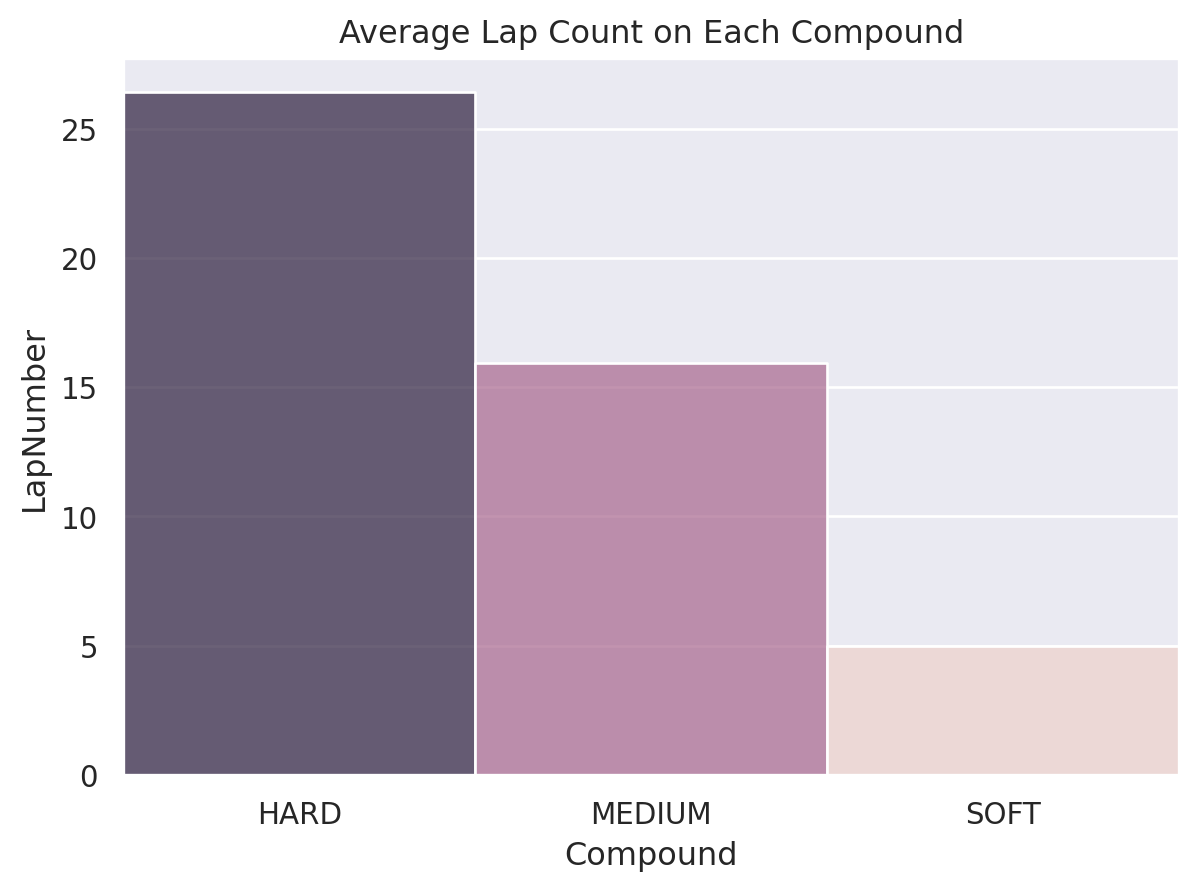

In [168]:
# g = sns.barplot(data=lapsg, x="Compound", y="LapNumber")
# g.set_title("Average Lap Count on Each Compound")
so.Plot(data=lapsg, x="Compound", y="LapNumber", color="LapNumber") \
    .add(so.Bars(), legend=False) \
    .label(title="Average Lap Count on Each Compound")

### Race - Driver Information

#### Summary Table

In [61]:
drivers_summary = pd.DataFrame()

laps = laps_raw[laps_raw["EventName"] == race]
for driver in laps["Driver"].unique():
    laps_c = laps[laps["Driver"] == driver]
    pit_stops_c = pit_stops.copy()
    pit_times_c = pit_times.copy()
    
    pit_stops_c = pit_stops_c[(pit_stops_c["Driver"] == driver) & (pit_stops_c["EventName"] == race)]
    pit_times_c = pit_times_c[(pit_times_c["Driver"] == driver) & (pit_times_c["EventName"] == race)]
    
    # Total Lap Time
    lapsg = laps_c[["EventName", "Sec"]].groupby("EventName").sum()
    lapsg["LapTime"] = datetime.timedelta(seconds=lapsg["Sec"].iloc[0]) 
    lapsg = lapsg[["LapTime"]]
    
    # Avg Lap Time
    lapsgg = laps_c[["EventName", "Sec"]].groupby("EventName").mean()
    lapsgg["LapTime"] = datetime.timedelta(seconds=lapsgg["Sec"].iloc[0]) 
    lapsgg = lapsgg[["LapTime"]]
    
    try:
        position = pit_times_c["ClassifiedPosition"].iloc[0]
    except IndexError:
        position = "DNF / DQ"
    
    d_driver = {
        "Driver": driver,
        "Pit Stops":[pit_stops_c[["PitStops"]].sum().iloc[0]],
        "Pit Time":[str(pit_times_c["PitTime"].sum())[7:-3]],
        "Laps Completed":[laps_c.groupby(["EventName", "Driver"]).last().reset_index()["LapNumber"].sum()],
        "Total Lap Time":[lapsg.to_string(header=False, index=False)[7:-3]],
        "Avg Lap Time":[lapsgg.to_string(header=False, index=False)[7:-3]],
        "Position": [position],
    }
    df_driver = pd.DataFrame(d_driver).T
    df_driver.columns = [""]
    drivers_summary = pd.concat([drivers_summary, df_driver.T], axis=0)
drivers_summary
    

,Driver,Pit Stops,Pit Time,Laps Completed,Total Lap Time,Avg Lap Time,Position
,HAM,2,00:00:45.863,44.0000,01:19:57.566,00:01:49.035,1
,PIA,2,00:00:46.928,44.0000,01:19:58.213,00:01:49.050,2
,LEC,2,00:00:46.771,44.0000,01:20:05.589,00:01:49.217,3
,VER,2,00:00:46.065,44.0000,01:20:06.266,00:01:49.233,4
,NOR,2,00:00:45.360,44.0000,01:20:06.890,00:01:49.247,5
,SAI,2,00:00:45.944,44.0000,01:20:16.835,00:01:49.473,6
,PER,3,00:01:07.905,44.0000,01:20:40.235,00:01:50.005,7
,ALO,1,00:00:23.116,44.0000,01:20:47.003,00:01:50.159,8
,OCO,2,00:00:46.951,44.0000,01:20:49.592,00:01:50.218,9
,RIC,2,00:00:44.888,44.0000,01:20:51.966,00:01:50.271,10


#### Driver Compound Usage

In [62]:
laps = laps_raw[laps_raw["EventName"] == race]
compounds = laps["Compound"].unique()

driver_compound = pd.DataFrame(columns=compounds)

for driver in laps["Driver"].unique():
    laps_c = laps[laps["Driver"] == driver]
    
    individual_compound_use = laps_c.groupby(["Driver", "Compound"]).count()[["LapNumber"]].reset_index() \
            [["Compound", "LapNumber"]].set_index("Compound").rename(columns={"LapNumber":driver}).T
    
    driver_compound = pd.concat([driver_compound, individual_compound_use], axis=0)
    # 	Driver 	Compound 	LapNumber
    # 0 	HAM 	HARD 	33.000
    # 1 	HAM 	MEDIUM 	11.000
    
driver_compound.fillna(0)


# """
#         SOFT   MED   HARD   WET
# Driver   x     y     z      a
# Driver   x     y     z      a
# """

,MEDIUM,HARD,SOFT
HAM,11,33,0
PIA,11,33,0
LEC,12,32,0
VER,26,18,0
NOR,15,29,0
SAI,8,36,0
PER,21,21,2
ALO,13,31,0
OCO,12,32,0
RIC,13,23,8


<Axes: >

<Figure size 1500x500 with 0 Axes>

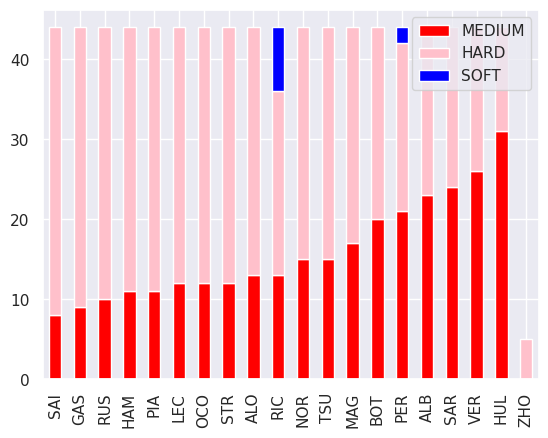

In [63]:
fig = plt.figure(figsize=(15,5))
driver_compound.sort_values("MEDIUM").plot(kind='bar', stacked=True, color=['red', 'pink', 'blue'])

#### Driver Pit Time

In [64]:
drivers_summary

,Driver,Pit Stops,Pit Time,Laps Completed,Total Lap Time,Avg Lap Time,Position
,HAM,2,00:00:45.863,44.0000,01:19:57.566,00:01:49.035,1
,PIA,2,00:00:46.928,44.0000,01:19:58.213,00:01:49.050,2
,LEC,2,00:00:46.771,44.0000,01:20:05.589,00:01:49.217,3
,VER,2,00:00:46.065,44.0000,01:20:06.266,00:01:49.233,4
,NOR,2,00:00:45.360,44.0000,01:20:06.890,00:01:49.247,5
,SAI,2,00:00:45.944,44.0000,01:20:16.835,00:01:49.473,6
,PER,3,00:01:07.905,44.0000,01:20:40.235,00:01:50.005,7
,ALO,1,00:00:23.116,44.0000,01:20:47.003,00:01:50.159,8
,OCO,2,00:00:46.951,44.0000,01:20:49.592,00:01:50.218,9
,RIC,2,00:00:44.888,44.0000,01:20:51.966,00:01:50.271,10


### Race - Team Information

#### Summary Table

In [65]:
teams_summary = pd.DataFrame()

laps = laps_raw[laps_raw["EventName"] == race]
for team in laps["Team"].unique():
    laps_c = laps[laps["Team"] == team]
    
    pit_stops_c = pit_stops.copy()
    # Get team info on pit_stops
    pit_stops_c = pd.merge(left=pit_stops_c, right=laps_raw, left_on=["EventName", "Driver"], right_on=["EventName", "Driver"]) \
        [["EventName", "Driver", "Team", "PitStops"]].drop_duplicates()
    
    pit_times_c = pit_times.copy()
    # Get team info on pit_times
    pit_times_c = pd.merge(left=pit_times_c, right=laps_raw, left_on=["EventName", "Driver"], right_on=["EventName", "Driver"]) \
        [["EventName", "Driver", "Team", "PitTime"]].drop_duplicates()
    
    pit_stops_c = pit_stops_c[(pit_stops_c["Team"] == team) & (pit_stops_c["EventName"] == race)]
    pit_times_c = pit_times_c[(pit_times_c["Team"] == team) & (pit_times_c["EventName"] == race)]
    
    # Total Lap Time
    lapsg = laps_c[["EventName", "Sec"]].groupby("EventName").sum()
    lapsg["LapTime"] = datetime.timedelta(seconds=lapsg["Sec"].iloc[0]) 
    lapsg = lapsg[["LapTime"]]
    
    # Avg Lap Time
    lapsgg = laps_c[["EventName", "Sec"]].groupby("EventName").mean()
    lapsgg["LapTime"] = datetime.timedelta(seconds=lapsgg["Sec"].iloc[0]) 
    lapsgg = lapsgg[["LapTime"]]
    
    d_team = {
        "Team": team,
        "Drivers": [len(laps_c["Driver"].unique())],
        "Pit Stops":[pit_stops_c[["PitStops"]].sum().iloc[0]],
        "Pit Time":[pit_times_c["PitTime"].sum()],
        "Laps Completed":[laps_c.groupby(["EventName", "Team"]).last().reset_index()["LapNumber"].sum()],
        "Total Lap Time":[lapsg.to_string(header=False, index=False)[7:-3]],
        "Avg Lap Time":[lapsgg.to_string(header=False, index=False)[7:-3]],
    }
    df_team = pd.DataFrame(d_team).T
    df_team.columns = [""]
    teams_summary = pd.concat([teams_summary, df_team.T], axis=0)
teams_summary["Pit Time"] = convert_days_format_to_datetime(teams_summary["Pit Time"].astype(str), False)
teams_summary["Pit Time"] = teams_summary["Pit Time"].str[:-3]
teams_summary.sort_values("Total Lap Time")

,Team,Drivers,Pit Stops,Pit Time,Laps Completed,Total Lap Time,Avg Lap Time
,Kick Sauber,2,2,00:00:46.272,5.0000,01:29:06.907,00:01:51.393
,Mercedes,2,3,00:00:45.863,44.0000,02:39:54.606,00:01:49.029
,McLaren,2,4,00:01:32.288,44.0000,02:40:05.103,00:01:49.148
,Ferrari,2,4,00:01:32.715,44.0000,02:40:22.424,00:01:49.345
,Red Bull Racing,2,5,00:01:53.970,44.0000,02:40:46.501,00:01:49.619
,Aston Martin,2,2,00:00:46.000,44.0000,02:41:47.054,00:01:50.307
,Alpine,2,4,00:01:32.830,44.0000,02:41:50.997,00:01:50.352
,RB,2,3,00:01:08.311,44.0000,02:42:05.743,00:01:50.519
,Williams,2,4,00:01:33.214,44.0000,02:42:23.788,00:01:50.724
,Haas F1 Team,2,3,00:01:10.476,44.0000,02:42:29.544,00:01:50.790


#### Team Compound Usage

In [66]:
laps = laps_raw[laps_raw["EventName"] == race]
compounds = laps["Compound"].unique()

team_compound = pd.DataFrame(columns=compounds)

for team in laps["Team"].unique():
    laps_c = laps[laps["Team"] == team]
    
    individual_compound_use = laps_c.groupby(["Team", "Compound"]).count()[["LapNumber"]].reset_index() \
            [["Compound", "LapNumber"]].set_index("Compound").rename(columns={"LapNumber":team}).T
    
    team_compound = pd.concat([team_compound, individual_compound_use], axis=0)
    # 	Driver 	Compound 	LapNumber
    # 0 	HAM 	HARD 	33.000
    # 1 	HAM 	MEDIUM 	11.000
    
team_compound.fillna(0)


# """
#         SOFT   MED   HARD   WET
# Driver   x     y     z      a
# Driver   x     y     z      a
# """

,MEDIUM,HARD,SOFT
Mercedes,21,67,0
McLaren,26,62,0
Ferrari,20,68,0
Red Bull Racing,47,39,2
Aston Martin,25,63,0
Alpine,21,67,0
RB,28,52,8
Williams,47,41,0
Haas F1 Team,48,40,0
Kick Sauber,20,29,0


<Axes: >

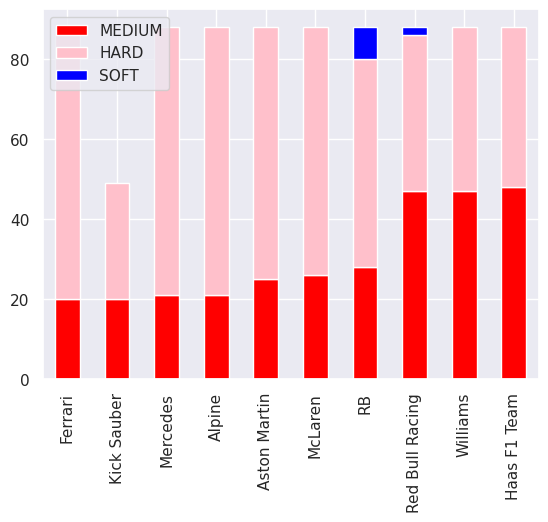

In [67]:
team_compound.sort_values("MEDIUM").plot(kind='bar', stacked=True, color=['red', 'pink', 'blue'])

#### Team Pit Time

In [68]:
teams_summary

,Team,Drivers,Pit Stops,Pit Time,Laps Completed,Total Lap Time,Avg Lap Time
,Mercedes,2,3,00:00:45.863,44.0000,02:39:54.606,00:01:49.029
,McLaren,2,4,00:01:32.288,44.0000,02:40:05.103,00:01:49.148
,Ferrari,2,4,00:01:32.715,44.0000,02:40:22.424,00:01:49.345
,Red Bull Racing,2,5,00:01:53.970,44.0000,02:40:46.501,00:01:49.619
,Aston Martin,2,2,00:00:46.000,44.0000,02:41:47.054,00:01:50.307
,Alpine,2,4,00:01:32.830,44.0000,02:41:50.997,00:01:50.352
,RB,2,3,00:01:08.311,44.0000,02:42:05.743,00:01:50.519
,Williams,2,4,00:01:33.214,44.0000,02:42:23.788,00:01:50.724
,Haas F1 Team,2,3,00:01:10.476,44.0000,02:42:29.544,00:01:50.790
,Kick Sauber,2,2,00:00:46.272,5.0000,01:29:06.907,00:01:51.393


### Race - Relationships

#### Relationship 1 - Tire Compound Choice vs Lap Time

Task: Investigate how different tire compounds (e.g., Soft, Medium, Hard) correlate with lap times throughout the race.

Objective: Identify which tire compounds lead to faster lap times and whether this varies depending on the stint or race phase.

---

Answered in above summary

#### Relationship 2 - Starting Tire Type vs Final Classification


Task: Explore how starting the race on different tire compounds (Hard, Soft, Medium) impacts the final classification.

Objective: Understand whether the initial tire choice plays a significant role in determining race outcomes.

In [69]:
lapsg = laps[laps["Stint"] == 1].merge(results_raw[["EventName", "Abbreviation", "ClassifiedPosition"]], \
                                left_on=["EventName", "Driver"], right_on=["EventName", "Abbreviation"])
lapsg = lapsg[pd.to_numeric(lapsg['ClassifiedPosition'], errors='coerce').notnull()]
lapsg["ClassifiedPosition"] = lapsg["ClassifiedPosition"].astype(int)
lapsg = lapsg[["Position", "ClassifiedPosition", "TyreLife", "Compound"]].groupby("Compound").mean().reset_index()
lapsgg = lapsg.melt(id_vars=["Compound"], value_vars=["ClassifiedPosition", "TyreLife"])
lapsg

,Compound,Position,ClassifiedPosition,TyreLife
0,HARD,3.7000,6.0000,10.5000
1,MEDIUM,9.5220,9.4670,6.4945
2,SOFT,14.3750,10.0000,4.5000


In [70]:
"""
Observation:
Position > Class goes UP (lose rank, higher tyre life) on HARD
Position > Class goes DOWN (gain rank, lower life) on SOFT
Stays the same on MED

With MED as a baseline:
Soft gains ~4.375 positions, loses ~2 laps of tyre life
Hard loses ~2.3 positions, gains 6 laps of tyre life
"""

'\nObservation:\nPosition > Class goes UP (lose rank, higher tyre life) on HARD\nPosition > Class goes DOWN (gain rank, lower life) on SOFT\nStays the same on MED\n\nWith MED as a baseline:\nSoft gains ~4.375 positions, loses ~2 laps of tyre life\nHard loses ~2.3 positions, gains 6 laps of tyre life\n'

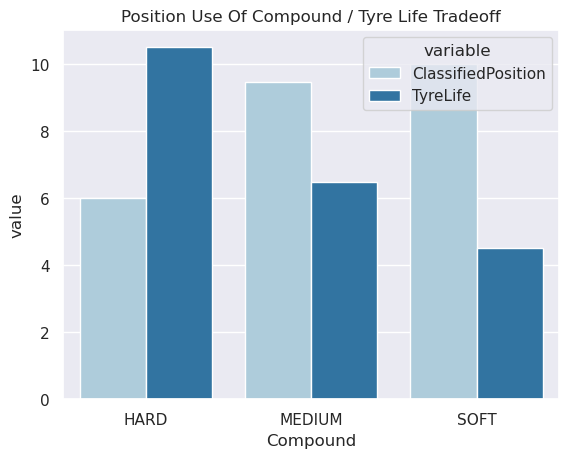

In [71]:
# Stolen from https://stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)


g = sns.barplot(data=lapsgg, x="Compound", y="value", hue="variable")#, palette=colors_from_values(lapsgg["value"], "Blues_r"))
g.set_title("Position Use Of Compound / Tyre Life Tradeoff");

#### Relationship 3 - Number of Laps on a Compound vs Delta Time

Task: Explore the relationship between the number of laps driven on a particular tire compound and the delta time (change in lap times) over those laps.

Objective: Understand how tire wear affects performance, particularly how lap times degrade as tires wear out during a stint.

In [170]:
lapsg = laps[laps["Stint"] == 1][["Driver", "Sec", "Compound", "LapNumber"]] \
            .groupby(["Compound", "Driver"]).agg([lambda x: x.iloc[1], lambda y: y.iloc[-2]])
lapsg.columns = ["_".join(x) for x in lapsg.columns.ravel()] #lapsg.columns.droplevel(1)
lapsg = lapsg.drop(columns=["LapNumber_<lambda_0>"]).rename(columns={"LapNumber_<lambda_1>":"LapNumber"})
lapsg["LapNumber"] += 1
lapsg["SecDelta"] = lapsg["Sec_<lambda_0>"] - lapsg["Sec_<lambda_1>"]
lapsg = lapsg.sort_values("SecDelta").reset_index()
lapsg["CD"] = lapsg["Compound"] + "_" + lapsg["Driver"]
lapsg[["Compound", "Driver", "SecDelta", "LapNumber"]].set_index(["Compound", "Driver"])

SecDelta  LapNumber
Compound Driver                     
MEDIUM   VER      -0.7810    10.0000
HARD     ZHO      -0.2770     5.0000
MEDIUM   GAS      -0.1150     9.0000
         HAM      -0.1020    11.0000
         RUS       0.0180    10.0000
         PIA       0.1190    11.0000
         PER       0.1830    11.0000
SOFT     RIC       0.2510     8.0000
MEDIUM   LEC       0.2730    12.0000
         ALB       0.3770     8.0000
         OCO       0.3800    12.0000
         ALO       0.4250    13.0000
         HUL       0.5220     7.0000
         BOT       0.5890    11.0000
         SAR       0.6260     8.0000
         STR       0.8920    12.0000
         NOR       0.9370    15.0000
HARD     SAI       1.2080    20.0000
MEDIUM   MAG       1.2590    17.0000
         TSU       1.2740    15.0000

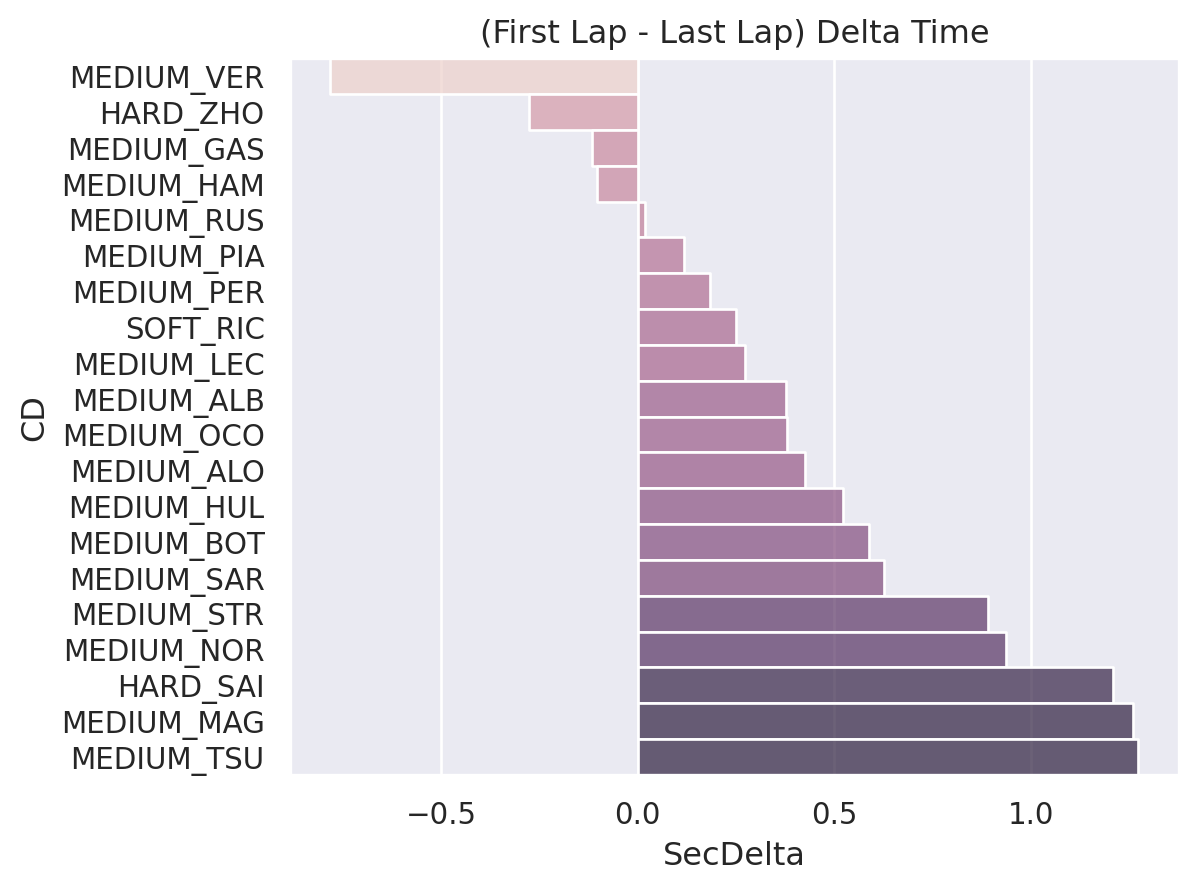

<Figure size 500x500 with 0 Axes>

In [171]:
fig = plt.figure(figsize=(5,5))
# g = sns.barplot(data=lapsg, y="CD", x="SecDelta")
so.Plot(data=lapsg, x="SecDelta", y="CD", color="SecDelta") \
        .add(so.Bars(), legend=False) \
        .label(title="(First Lap - Last Lap) Delta Time")
        # .scale(color="flare") \
        # .on(ax2).plot()
# g.set_title("(First Lap - Last Lap) Delta Time");
# plt.xticks(rotation=80);

#### Relationship 3.5 - Lap Times Over A Stint

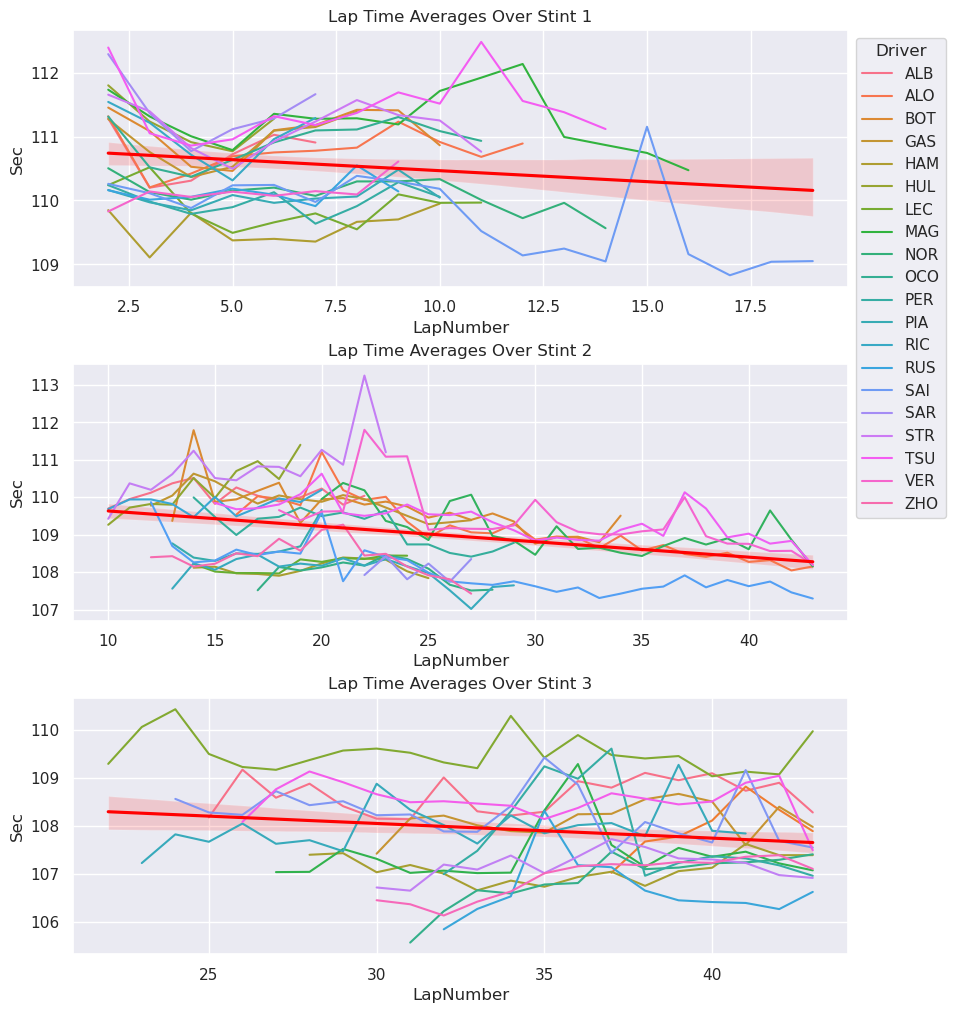

In [174]:
lapsg = laps[["Driver", "Sec", "LapNumber", "Stint"]]
lapsg = lapsg[lapsg["Sec"] < lapsg["Sec"].quantile(0.99)]
lapsg = lapsg.groupby(["Driver", "Stint"]).apply(lambda x: x.iloc[1:-1])
fig = plt.figure(figsize=(10,12))
gs = gridspec.GridSpec(3,1, hspace=0.30)#, right=0.48, wspace=0.05)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[2,0])

ax1.set_title("Lap Time Averages Over Stint 1")
ax2.set_title("Lap Time Averages Over Stint 2")
ax3.set_title("Lap Time Averages Over Stint 3")


sns.lineplot(data=lapsg[lapsg["Stint"] == 1], y="Sec", x="LapNumber", hue="Driver", ax=ax1)
sns.lineplot(data=lapsg[lapsg["Stint"] == 2], y="Sec", x="LapNumber", hue="Driver", ax=ax2)
sns.lineplot(data=lapsg[lapsg["Stint"] == 3], y="Sec", x="LapNumber", hue="Driver", ax=ax3)

ax2.legend_.remove()
ax3.legend_.remove()

sns.regplot(y="Sec", x="LapNumber", data=lapsg[lapsg["Stint"] == 1], ax=ax1, color="Red", scatter=False);
sns.regplot(y="Sec", x="LapNumber", data=lapsg[lapsg["Stint"] == 2], ax=ax2, color="Red", scatter=False);
sns.regplot(y="Sec", x="LapNumber", data=lapsg[lapsg["Stint"] == 3], ax=ax3, color="Red", scatter=False);

# Need: For every stint group, kill the last lap
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))

#### Relationship 4 - Number of Stops vs Final Position

Task: Analyze the relationship between the number of pit stops a driver makes and their final position in the race.

Objective: Understand how the frequency of pit stops impacts race outcomes, particularly whether fewer or more stops lead to better results.

,ClassifiedPosition,PitStops
ClassifiedPosition,1.0000,-0.2891
PitStops,-0.2891,1.0000


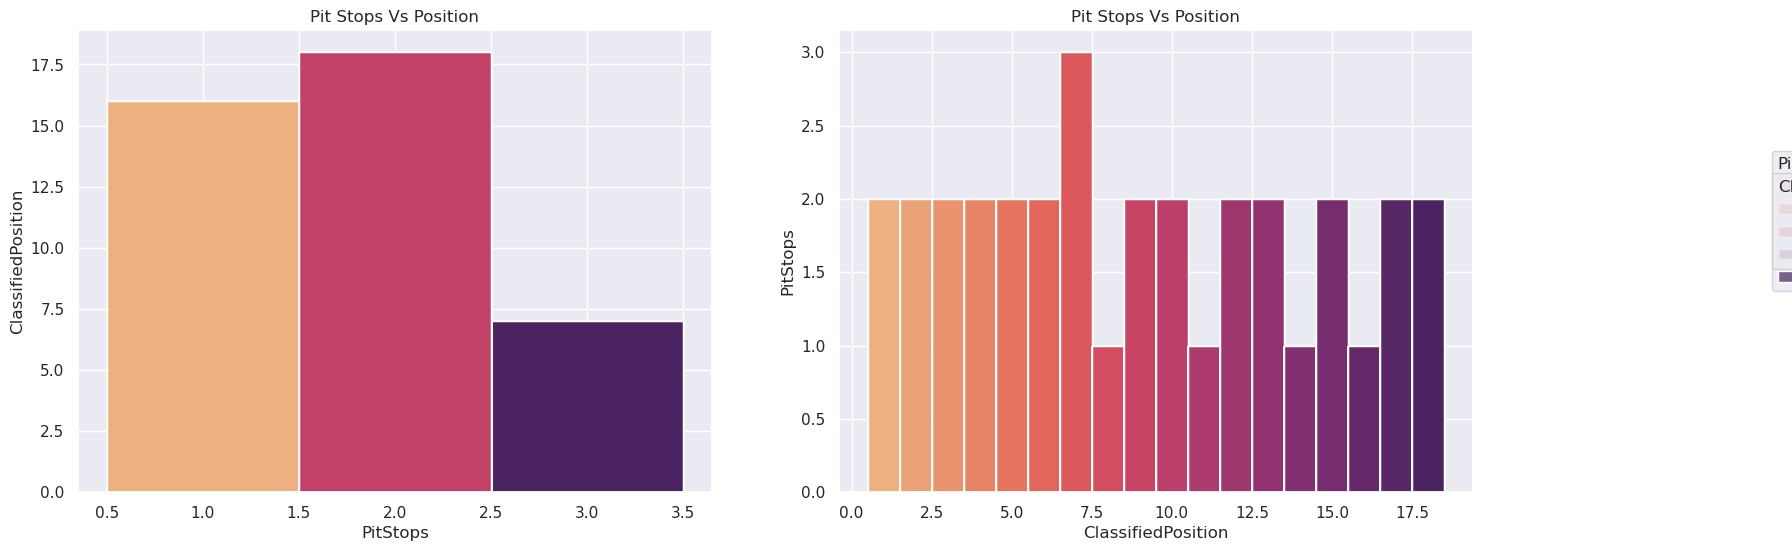

In [145]:
lapsg = laps.merge(results_raw[["EventName", "Abbreviation", "ClassifiedPosition"]], \
                                left_on=["EventName", "Driver"], right_on=["EventName", "Abbreviation"])
lapsg = lapsg[pd.to_numeric(lapsg['ClassifiedPosition'], errors='coerce').notnull()]
lapsg["ClassifiedPosition"] = lapsg["ClassifiedPosition"].astype(int)
lapsg = pd.merge(left=lapsg, right=pit_stops, left_on=["EventName", "Driver"], right_on=["EventName", "Driver"])
lapsg = lapsg[["EventName", "Driver", "Stint", "ClassifiedPosition", "PitStops"]]

fig = plt.figure(figsize=(18,6))
gs = gridspec.GridSpec(1,2)#, right=0.48, wspace=0.05)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

ax1.set_title("Pit Stops Vs Position")
ax2.set_title("Pit Stops Vs Position")

# plt.ylim(bottom=0, top=3.5)
# sns.barplot(data=lapsg, x="PitStops", y="ClassifiedPosition", ax=ax1)
p1 = so.Plot(data=lapsg, x="PitStops", y="ClassifiedPosition", color="PitStops") \
        .add(so.Bars()) \
        .scale(color="flare") \
        .label(title="Pit Stops Vs Position") \
        .on(ax1).plot()
p2 = so.Plot(data=lapsg, x="ClassifiedPosition", y="PitStops", color="ClassifiedPosition") \
        .add(so.Bars()) \
        .scale(color="flare") \
        .label(title="Pit Stops Vs Position") \
        .on(ax2).plot()

# sns.barplot(data=lapsg, y="PitStops", x="ClassifiedPosition", ax=ax2)
# sns.regplot(y="ClassifiedPosition", x="PitStops", data=lapsg, ax=ax1, scatter=False)
# sns.regplot(x="ClassifiedPosition", y="PitStops", data=lapsg, ax=ax2, scatter=False)
lapsg[["ClassifiedPosition", "PitStops"]].corr()

#### Relationship 5 - Race Length vs Strategy

Task: Examine how the total number of laps in each race influenced the pit stop strategy and tire choices for teams and drivers.

Objective: Understand how race length affects strategic decisions, particularly in terms of the number of stops and tire choices.

In [76]:
# total_laps = laps_raw[["EventName", "LapNumber"]].groupby(["EventName"]).last().reset_index()
# total_laps = total_laps.rename(columns={"LapNumber":"TotalLaps"})
# # total_laps

In [77]:
# # Yes I'm aware I'm copying code - shut up about it
# # This is mostly an internal monologue between me and myself

# import scipy

# lapsg = laps.merge(results_raw[["EventName", "Abbreviation", "ClassifiedPosition"]], \
#                                 left_on=["EventName", "Driver"], right_on=["EventName", "Abbreviation"])
# lapsg = lapsg.merge(total_laps, on="EventName") 
# lapsg = lapsg[pd.to_numeric(lapsg['ClassifiedPosition'], errors='coerce').notnull()]
# lapsg["ClassifiedPosition"] = lapsg["ClassifiedPosition"].astype(int)
# lapsg = pd.merge(left=lapsg, right=pit_stops, left_on=["EventName", "Driver"], right_on=["EventName", "Driver"])
# lapsg = lapsg[["EventName", "Driver", "PitStops", "TotalLaps"]]
# # lapsg.drop_duplicates()
# # lapsg = lapsg[lapsg["TotalLaps"] > lapsg["TotalLaps"].quantile(0.10)]
# lapsg
# # # Relationship between race length and total pit stops
# fig = plt.figure(figsize=(18,6))
# gs = gridspec.GridSpec(2,2, hspace=0.25, wspace=0.11)
# ax1 = fig.add_subplot(gs[0,0])
# ax2 = fig.add_subplot(gs[0,1])
# ax3 = fig.add_subplot(gs[1,0])
# ax4 = fig.add_subplot(gs[1,1])
# lapsg
# ax1.set_title("Race Length vs Pit Stops")
# ax2.set_title("Race Length vs Pit Stops")
# sns.barplot(data=lapsg, x="PitStops", y="TotalLaps", ax=ax1)
# sns.barplot(data=lapsg, y="PitStops", x="TotalLaps", ax=ax2)
# g1 = sns.regplot(y="TotalLaps", x="PitStops", data=lapsg, ax=ax3, scatter=False)
# g2 = sns.regplot(x="TotalLaps", y="PitStops", data=lapsg, ax=ax4, scatter=False)

# slope1, _,_,_,_ = scipy.stats.linregress(x=g1.get_lines()[0].get_xdata(),y=g1.get_lines()[0].get_ydata())
# slope2, _,_,_,_ = scipy.stats.linregress(x=g2.get_lines()[0].get_xdata(),y=g2.get_lines()[0].get_ydata())
# plt.figtext(0.135,0.4, "Slope: " + str(slope1)[:6],size=20)
# plt.figtext(0.56,0.4, "Slope: " + str(slope2)[:6],size=20);
# lapsg.corr()

In [78]:
# # How does total lap number affect compound usage?

# lapsg = laps.merge(results_raw[["EventName", "Abbreviation", "ClassifiedPosition"]], \
#                                 left_on=["EventName", "Driver"], right_on=["EventName", "Abbreviation"])
# lapsg = lapsg.merge(total_laps, on="EventName") 
# lapsg = lapsg[pd.to_numeric(lapsg['ClassifiedPosition'], errors='coerce').notnull()]
# lapsg["ClassifiedPosition"] = lapsg["ClassifiedPosition"].astype(int)
# lapsg = pd.merge(left=lapsg, right=pit_stops, left_on=["EventName", "Driver"], right_on=["EventName", "Driver"])
# lapsg = lapsg[["EventName", "Driver", "PitStops", "TotalLaps", "Compound", "Stint"]]
# lapsg = lapsg.drop_duplicates().groupby(["Compound", "Stint"]).median().reset_index()
# sns.barplot(data=lapsg, x="Compound", y="TotalLaps")
# lapsg

Bonus: Rubber-in / Weight loss from fuel during a race

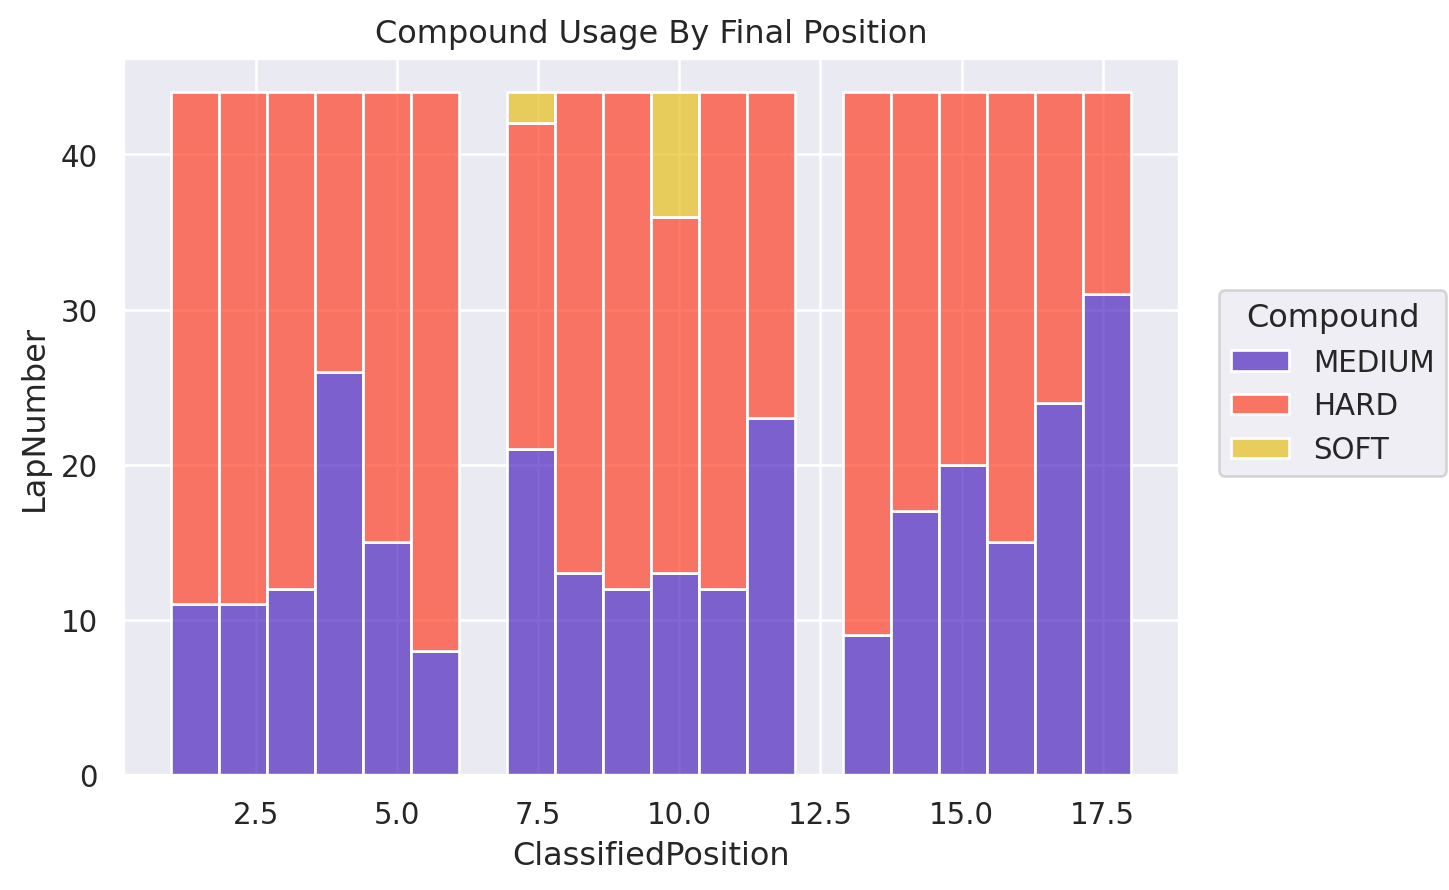

In [147]:
lapsg = laps.merge(results_raw[["EventName", "Abbreviation", "ClassifiedPosition"]], \
                                left_on=["EventName", "Driver"], right_on=["EventName", "Abbreviation"])
lapsg = lapsg[pd.to_numeric(lapsg['ClassifiedPosition'], errors='coerce').notnull()]
lapsg["ClassifiedPosition"] = lapsg["ClassifiedPosition"].astype(int)
lapsg = pd.merge(left=lapsg, right=pit_stops, left_on=["EventName", "Driver"], right_on=["EventName", "Driver"])
lapsg = lapsg[["EventName", "Driver", "Stint", "ClassifiedPosition", "PitStops", "LapNumber", "Compound"]]
# lapsg.drop_duplicates()
so.Plot(lapsg, x="ClassifiedPosition", y="LapNumber", color="Compound") \
        .add(so.Bars(), so.Hist(bins=20), so.Stack()) \
        .scale(color="CMRmap") \
        .label(title="Compound Usage By Final Position")

### Thoughts

* Could have done more data merging at the beginning with laps (pit stops, times, total laps, sec, etc
* Combine as much into one dataframe as possible and then just use that dataframe everywhere
    * Currently I have a bunch of DFs I cant keep track of
    * Time columns are annoying and I should have just done it once and been done with it